# From 2016 to 2020, How Politics Have Changed In America

### Aditya Gupta and Brandon Kim


The year 2016 marked a new age for America, when the presidency of President Barack Obama ended and Donald Trump was elected into office. Just four years later, this dramatic change has occured again, as Joe Biden was just recently elected as the new President of the United States in November 2020. From President Obama to President Trump to soon-to-be president Biden, the political affiliation of the country's leader has changed from Democrat to Republican, and back to Democrat. More interesting than this change in political affiliation was the voter turnout in 2020, as it was the highest ever recorded in the United States of America's history. In addition, many authoritative figures claimed this presidential election to be the most important election that the country has ever had, which could be a reason why there was a such a large increase in voter turnout from 2016 to 2020.

Because Joe Biden- a Democrat- won the election, this means that states in the country needed to flip in order for him to win. Of the many states that flipped, there are a few large states that played an imporant role in Biden's win as President elect. The states that my partner Adit and I chose to research were Arizona, Georgia, Michigan, Pennsylvania, and Wisconsin. When looking at these states, we first wanted to see which counties in these states had the highest percentage in relation to the state's total votes. These highly populated counties contribute the most to the election of either candidate. Next, we checked to see how each county increased in voter turnout between the two elections. Lastly, we made maps of each state which color coded increases in turnout based on county.

# Data Scraping

To begin our analysis and comparison of the 2016 and 2020 election data, we will first take a look at the data for voter turnout and demographics from the elections. To do this, we are going to scrape our 
election data from the link provided below. I pulled the 2016 and 2020 data and created a dataframe out of it. We will be looking at the voter data to see which counties in our selected states had the largest percentage in comparison to the total state's vote count.

The election results at the county-level are scraped from results published by Townhall.com. Their formatted tables for the  elections makes it easy for pandas to create a dataframe to capture results. This data was converted into a csv and added 
to a github repository by the user 'tonmcg', and this is where I scraped the data.

For more information on the 2016 dataset, visit [Github 2016 Election Data](https://github.com/tonmcg/US_County_Level_Election_Results_08-20/blob/master/2016_US_County_Level_Presidential_Results.csv)

For more information on the 2020 dataset, visit [Github_2020_Election_data](https://github.com/tonmcg/US_County_Level_Election_Results_08-20/blob/master/2020_US_County_Level_Presidential_Results.csv)


In [177]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np 
import seaborn

df_2016 = pd.read_csv("election2016/2016_US_County_Level_Presidential_Results.csv")
df_2016 = df_2016.drop(['Unnamed: 0'], axis=1) # Getting rid of extra index column
df_2016['percent_votes'] = 0
df_2016

votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
0       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
1       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
2       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
3       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
4       93003.0   130413.0     246588.0  0.377159  0.528870  37,410   
...         ...        ...          ...       ...       ...     ...   
3136     3233.0    12153.0      16661.0  0.194046  0.729428   8,920   
3137     7313.0     3920.0      12176.0  0.600608  0.321945   3,393   
3138     1202.0     6154.0       8053.0  0.149261  0.764187   4,952   
3139      532.0     2911.0       3715.0  0.143203  0.783580   2,379   
3140      294.0     2898.0       3334.0  0.088182  0.869226   2,604   

     per_point_diff state_abbr        county_name  combined_fips  \
0            15.17%         AK             Alaska           2013   
1            15.17%         AK             Alaska           2016   
2            15.17%         AK             Alaska           2020   
3            15.17%         AK             Alaska           2050   
4            15.17%         AK             Alaska           2060   
...             ...        ...                ...            ...   
3136         53.54%         WY  Sweetwater County          56037   
3137         27.87%         WY       Teton County          56039   
3138         61.49%         WY       Uinta County          56041   
3139         64.04%         WY    Washakie County          56043   
3140         78.10%         WY      Weston County          56045   

      percent_votes  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
3136              0  
3137              0  
3138              0  
3139              0  
3140              0  

[3141 rows x 11 columns]

Here is the 2016 data per county in the US.

In [178]:
df_2020 = pd.read_csv ('election2020/2020_US_County_Level_Presidential_Results.csv')
df_2020['percent_votes'] = 0
df_2020

state_name  county_fips        county_name  votes_gop  votes_dem  \
0       Alabama         1001     Autauga County      19838       7503   
1       Alabama         1003     Baldwin County      83544      24578   
2       Alabama         1005     Barbour County       5622       4816   
3       Alabama         1007        Bibb County       7525       1986   
4       Alabama         1009      Blount County      24711       2640   
...         ...          ...                ...        ...        ...   
3147    Wyoming        56037  Sweetwater County      12229       3823   
3148    Wyoming        56039       Teton County       4341       9848   
3149    Wyoming        56041       Uinta County       7496       1591   
3150    Wyoming        56043    Washakie County       3245        651   
3151    Wyoming        56045      Weston County       3107        360   

      total_votes   diff   per_gop   per_dem  per_point_diff  percent_votes  
0           27770  12335  0.714368  0.270184        0.444184              0  
1          109679  58966  0.761714  0.224090        0.537623              0  
2           10518    806  0.534512  0.457882        0.076631              0  
3            9595   5539  0.784263  0.206983        0.577280              0  
4           27588  22071  0.895716  0.095694        0.800022              0  
...           ...    ...       ...       ...             ...            ...  
3147        16603   8406  0.736554  0.230260        0.506294              0  
3148        14677  -5507  0.295769  0.670982       -0.375213              0  
3149         9402   5905  0.797277  0.169219        0.628058              0  
3150         4012   2594  0.808824  0.162263        0.646560              0  
3151         3542   2747  0.877188  0.101637        0.775551              0  

[3152 rows x 11 columns]

Here is the election data for 2020.

Now we will look at each of the flipped states from 2016 to 2020

### 2016 Election Arizona Data

In [179]:
AZ_data_2016 = df_2016[df_2016['state_abbr'] == "AZ"]
AZ_data_2016

votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
171    12196.0     5315.0      18659.0  0.653626  0.284849   6,881   
172    15291.0    25036.0      43147.0  0.354393  0.580249   9,745   
173    25308.0    16573.0      44929.0  0.563289  0.368871   8,735   
174     6746.0    13672.0      21398.0  0.315263  0.638938   6,926   
175     3301.0     8025.0      11939.0  0.276489  0.672167   4,724   
176     1092.0     1892.0       3243.0  0.336725  0.583410     800   
177     1318.0     3381.0       4931.0  0.267289  0.685662   2,063   
178   549040.0   590465.0    1201934.0  0.456797  0.491262  41,425   
179    16485.0    54656.0      74189.0  0.222203  0.736713  38,171   
180    15362.0    18165.0      35409.0  0.433845  0.513005   2,803   
181   195649.0   147019.0     360762.0  0.542322  0.407524  48,630   
182    35737.0    53857.0      93805.0  0.380971  0.574138  18,120   
183    10684.0     3650.0      14926.0  0.715798  0.244540   7,034   
184    29705.0    58862.0      92780.0  0.320166  0.634426  29,157   
185    18336.0    20586.0      40759.0  0.449864  0.505066   2,250   

    per_point_diff state_abbr        county_name  combined_fips  percent_votes  
171         36.88%         AZ      Apache County           4001              0  
172         22.59%         AZ     Cochise County           4003              0  
173         19.44%         AZ    Coconino County           4005              0  
174         32.37%         AZ        Gila County           4007              0  
175         39.57%         AZ      Graham County           4009              0  
176         24.67%         AZ    Greenlee County           4011              0  
177         41.84%         AZ      La Paz County           4012              0  
178          3.45%         AZ    Maricopa County           4013              0  
179         51.45%         AZ      Mohave County           4015              0  
180          7.92%         AZ      Navajo County           4017              0  
181         13.48%         AZ        Pima County           4019              0  
182         19.32%         AZ       Pinal County           4021              0  
183         47.13%         AZ  Santa Cruz County           4023              0  
184         31.43%         AZ     Yavapai County           4025              0  
185          5.52%         AZ        Yuma County           4027              0

### 2020 Election Arizona Data

In [180]:
AZ_data_2020 = df_2020[df_2020['state_name'] == 'Arizona']
AZ_data_2020

state_name  county_fips        county_name  votes_gop  votes_dem  \
107    Arizona         4001      Apache County      11442      23293   
108    Arizona         4003     Cochise County      35557      23732   
109    Arizona         4005    Coconino County      27052      44698   
110    Arizona         4007        Gila County      18377       8943   
111    Arizona         4009      Graham County      10749       4034   
112    Arizona         4011    Greenlee County       2433       1182   
113    Arizona         4012      La Paz County       5129       2236   
114    Arizona         4013    Maricopa County     995665    1040774   
115    Arizona         4015      Mohave County      78535      24831   
116    Arizona         4017      Navajo County      27657      23383   
117    Arizona         4019        Pima County     207758     304981   
118    Arizona         4021       Pinal County     107077      75106   
119    Arizona         4023  Santa Cruz County       6194      13138   
120    Arizona         4025     Yavapai County      91527      49602   
121    Arizona         4027        Yuma County      36534      32210   

     total_votes   diff   per_gop   per_dem  per_point_diff  percent_votes  
107        35183 -11851  0.325214  0.662053       -0.336839              0  
108        60473  11825  0.587981  0.392440        0.195542              0  
109        73346 -17646  0.368827  0.609413       -0.240586              0  
110        27678   9434  0.663957  0.323109        0.340848              0  
111        14996   6715  0.716791  0.269005        0.447786              0  
112         3688   1251  0.659707  0.320499        0.339208              0  
113         7460   2893  0.687534  0.299732        0.387802              0  
114      2069475 -45109  0.481120  0.502917       -0.021797              0  
115       104705  53704  0.750060  0.237152        0.512908              0  
116        51783   4274  0.534094  0.451557        0.082537              0  
117       520735 -97223  0.398971  0.585674       -0.186703              0  
118       185037  31971  0.578679  0.405897        0.172782              0  
119        19561  -6944  0.316650  0.671643       -0.354992              0  
120       143280  41925  0.638798  0.346189        0.292609              0  
121        69926   4324  0.522467  0.460630        0.061837              0

### 2016 Election Georgia Data

In [181]:
GA_data_2016 = df_2016[df_2016['state_abbr'] == "GA"]
GA_data_2016

votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
387     1434.0     5492.0       7003.0  0.204769  0.784235   4,058   
388      696.0     1873.0       2604.0  0.267281  0.719278   1,177   
389      607.0     3356.0       4010.0  0.151372  0.836908   2,749   
390      650.0      775.0       1440.0  0.451389  0.538194     125   
391     7965.0     7691.0      16075.0  0.495490  0.478445     274   
..         ...        ...          ...       ...       ...     ...   
541     7925.0    21514.0      30362.0  0.261017  0.708583  13,589   
542      852.0     2096.0       2973.0  0.286579  0.705012   1,244   
543     1844.0     2569.0       4470.0  0.412528  0.574720     725   
544     1893.0     2332.0       4276.0  0.442703  0.545370     439   
545     2015.0     6144.0       8266.0  0.243770  0.743286   4,129   

    per_point_diff state_abbr       county_name  combined_fips  percent_votes  
387         57.95%         GA    Appling County          13001              0  
388         45.20%         GA   Atkinson County          13003              0  
389         68.55%         GA      Bacon County          13005              0  
390          8.68%         GA      Baker County          13007              0  
391          1.70%         GA    Baldwin County          13009              0  
..             ...        ...               ...            ...            ...  
541         44.76%         GA  Whitfield County          13313              0  
542         41.84%         GA     Wilcox County          13315              0  
543         16.22%         GA     Wilkes County          13317              0  
544         10.27%         GA  Wilkinson County          13319              0  
545         49.95%         GA      Worth County          13321              0  

[159 rows x 11 columns]

### 2020 Election Georgia Data

In [182]:
GA_data_2020 = df_2020[df_2020['state_name'] == 'Georgia']
GA_data_2020

state_name  county_fips       county_name  votes_gop  votes_dem  \
398    Georgia        13001    Appling County       6570       1784   
399    Georgia        13003   Atkinson County       2300        825   
400    Georgia        13005      Bacon County       4017        625   
401    Georgia        13007      Baker County        897        652   
402    Georgia        13009    Baldwin County       8903       9140   
..         ...          ...               ...        ...        ...   
552    Georgia        13313  Whitfield County      25644      10680   
553    Georgia        13315     Wilcox County       2402        861   
554    Georgia        13317     Wilkes County       2823       2160   
555    Georgia        13319  Wilkinson County       2665       2074   
556    Georgia        13321      Worth County       6830       2395   

     total_votes   diff   per_gop   per_dem  per_point_diff  percent_votes  
398         8390   4786  0.783075  0.212634        0.570441              0  
399         3155   1475  0.729002  0.261490        0.467512              0  
400         4667   3392  0.860724  0.133919        0.726805              0  
401         1555    245  0.576849  0.419293        0.157556              0  
402        18251   -237  0.487809  0.500794       -0.012986              0  
..           ...    ...       ...       ...             ...            ...  
552        36766  14964  0.697492  0.290486        0.407006              0  
553         3279   1541  0.732540  0.262580        0.469960              0  
554         5030    663  0.561233  0.429423        0.131809              0  
555         4770    591  0.558700  0.434801        0.123899              0  
556         9285   4435  0.735595  0.257943        0.477652              0  

[159 rows x 11 columns]

### 2016 Election Michigan Data

In [183]:
MI_data_2016 = df_2016[df_2016['state_abbr'] == "MI"]
MI_data_2016

votes_dem  votes_gop  total_votes   per_dem   per_gop     diff  \
1230     1732.0     4201.0       6179.0  0.280304  0.679883    2,469   
1231     1663.0     2585.0       4513.0  0.368491  0.572790      922   
1232    17932.0    33812.0      55153.0  0.325132  0.613058   15,880   
1233     4877.0     9090.0      14688.0  0.332040  0.618873    4,213   
1234     4448.0     8469.0      13572.0  0.327734  0.624005    4,021   
...         ...        ...          ...       ...       ...      ...   
1308     7493.0    17421.0      26157.0  0.286463  0.666017    9,928   
1309    13258.0    17890.0      33213.0  0.399181  0.538645    4,632   
1310   128025.0    50335.0     187201.0  0.683891  0.268882   77,690   
1311   517842.0   228908.0     775450.0  0.667795  0.295194  288,934   
1312     4436.0    10000.0      15279.0  0.290333  0.654493    5,564   

     per_point_diff state_abbr       county_name  combined_fips  percent_votes  
1230         39.96%         MI     Alcona County          26001              0  
1231         20.43%         MI      Alger County          26003              0  
1232         28.79%         MI    Allegan County          26005              0  
1233         28.68%         MI     Alpena County          26007              0  
1234         29.63%         MI     Antrim County          26009              0  
...             ...        ...               ...            ...            ...  
1308         37.96%         MI    Tuscola County          26157              0  
1309         13.95%         MI  Van Buren County          26159              0  
1310         41.50%         MI  Washtenaw County          26161              0  
1311         37.26%         MI      Wayne County          26163              0  
1312         36.42%         MI    Wexford County          26165              0  

[83 rows x 11 columns]

### 2020 Election Michigan Data

In [184]:
MI_data_2020 = df_2020[df_2020['state_name'] == 'Michigan']
MI_data_2020

state_name  county_fips       county_name  votes_gop  votes_dem  \
1241   Michigan        26001     Alcona County       4848       2142   
1242   Michigan        26003      Alger County       3014       2053   
1243   Michigan        26005    Allegan County      41392      24449   
1244   Michigan        26007     Alpena County      10686       6000   
1245   Michigan        26009     Antrim County       9748       5960   
...         ...          ...               ...        ...        ...   
1319   Michigan        26157    Tuscola County      20297       8712   
1320   Michigan        26159  Van Buren County      21591      16803   
1321   Michigan        26161  Washtenaw County      56241     157136   
1322   Michigan        26163      Wayne County     264553     597170   
1323   Michigan        26165    Wexford County      12102       5838   

      total_votes    diff   per_gop   per_dem  per_point_diff  percent_votes  
1241         7064    2706  0.686297  0.303228        0.383069              0  
1242         5128     961  0.587754  0.400351        0.187402              0  
1243        67094   16943  0.616926  0.364399        0.252526              0  
1244        16969    4686  0.629737  0.353586        0.276151              0  
1245        15949    3788  0.611198  0.373691        0.237507              0  
...           ...     ...       ...       ...             ...            ...  
1319        29445   11585  0.689319  0.295874        0.393445              0  
1320        39066    4788  0.552680  0.430118        0.122562              0  
1321       216418 -100895  0.259872  0.726076       -0.466204              0  
1322       872469 -332617  0.303223  0.684460       -0.381236              0  
1323        18265    6264  0.662579  0.319628        0.342951              0  

[83 rows x 11 columns]

### 2016 Election Pennsylvania Data

In [185]:
PA_data_2016 = df_2016[df_2016['state_abbr'] == "PA"]
PA_data_2016

votes_dem  votes_gop  total_votes   per_dem   per_gop     diff  \
2243    14077.0    31249.0      47138.0  0.298634  0.662926   17,172   
2244   363017.0   257488.0     643173.0  0.564416  0.400340  105,529   
2245     6849.0    22676.0      30446.0  0.224956  0.744794   15,827   
2246    30225.0    46081.0      79036.0  0.382421  0.583038   15,856   
2247     3613.0    19455.0      23504.0  0.153719  0.827731   15,842   
...         ...        ...          ...       ...       ...      ...   
2305    34436.0    58941.0      96945.0  0.355212  0.607984   24,505   
2306     6398.0    15269.0      22365.0  0.286072  0.682719    8,871   
2307    59506.0   116427.0     181740.0  0.327424  0.640624   56,921   
2308     3573.0     8375.0      12418.0  0.287727  0.674424    4,802   
2309    67428.0   126933.0     203153.0  0.331907  0.624815   59,505   

     per_point_diff state_abbr          county_name  combined_fips  \
2243         36.43%         PA         Adams County          42001   
2244         16.41%         PA     Allegheny County          42003   
2245         51.98%         PA     Armstrong County          42005   
2246         20.06%         PA        Beaver County          42007   
2247         67.40%         PA       Bedford County          42009   
...             ...        ...                  ...            ...   
2305         25.28%         PA    Washington County          42125   
2306         39.66%         PA         Wayne County          42127   
2307         31.32%         PA  Westmoreland County          42129   
2308         38.67%         PA       Wyoming County          42131   
2309         29.29%         PA          York County          42133   

      percent_votes  
2243              0  
2244              0  
2245              0  
2246              0  
2247              0  
...             ...  
2305              0  
2306              0  
2307              0  
2308              0  
2309              0  

[67 rows x 11 columns]

### 2016 Election Pennsylvania Data

In [186]:
PA_data_2020 = df_2020[df_2020['state_name'] == "Pennsylvania"]
PA_data_2020

state_name  county_fips          county_name  votes_gop  votes_dem  \
2254  Pennsylvania        42001         Adams County      37523      18207   
2255  Pennsylvania        42003     Allegheny County     282913     430759   
2256  Pennsylvania        42005     Armstrong County      27489       8457   
2257  Pennsylvania        42007        Beaver County      54759      38122   
2258  Pennsylvania        42009       Bedford County      23025       4367   
...            ...          ...                  ...        ...        ...   
2316  Pennsylvania        42125    Washington County      72080      45088   
2317  Pennsylvania        42127         Wayne County      18637       9191   
2318  Pennsylvania        42129  Westmoreland County     130218      72129   
2319  Pennsylvania        42131       Wyoming County       9936       4704   
2320  Pennsylvania        42133          York County     146733      88114   

      total_votes    diff   per_gop   per_dem  per_point_diff  percent_votes  
2254        56714   19316  0.661618  0.321032        0.340586              0  
2255       724800 -147846  0.390333  0.594314       -0.203982              0  
2256        36370   19032  0.755815  0.232527        0.523288              0  
2257        94122   16637  0.581787  0.405028        0.176760              0  
2258        27574   18658  0.835026  0.158374        0.676652              0  
...           ...     ...       ...       ...             ...            ...  
2316       118478   26992  0.608383  0.380560        0.227823              0  
2317        28089    9446  0.663498  0.327210        0.336288              0  
2318       205183   58089  0.634643  0.351535        0.283108              0  
2319        14858    5232  0.668731  0.316597        0.352134              0  
2320       238471   58619  0.615308  0.369496        0.245812              0  

[67 rows x 11 columns]

### 2016 Election Wisconsin Data

In [187]:
WI_data_2016 = df_2016[df_2016['state_abbr'] == 'WI']
WI_data_2016

votes_dem  votes_gop  total_votes   per_dem   per_gop    diff  \
2991     3780.0     5983.0      10107.0  0.373998  0.591966   2,203   
2992     4136.0     3428.0       7926.0  0.521827  0.432501     708   
2993     7881.0    13595.0      22514.0  0.350049  0.603846   5,714   
2994     4953.0     4125.0       9491.0  0.521863  0.434622     828   
2995    53358.0    67192.0     127497.0  0.418504  0.527008  13,834   
...         ...        ...          ...       ...       ...     ...   
3058    79200.0   142521.0     233273.0  0.339516  0.610962  63,321   
3059     8303.0    16013.0      25491.0  0.325723  0.628182   7,710   
3060     3802.0     7669.0      11961.0  0.317866  0.641167   3,867   
3061    37054.0    43447.0      85892.0  0.431402  0.505833   6,393   
3062    14232.0    21502.0      37712.0  0.377387  0.570163   7,270   

     per_point_diff state_abbr       county_name  combined_fips  percent_votes  
2991         21.80%         WI      Adams County          55001              0  
2992          8.93%         WI    Ashland County          55003              0  
2993         25.38%         WI     Barron County          55005              0  
2994          8.72%         WI   Bayfield County          55007              0  
2995         10.85%         WI      Brown County          55009              0  
...             ...        ...               ...            ...            ...  
3058         27.14%         WI   Waukesha County          55133              0  
3059         30.25%         WI    Waupaca County          55135              0  
3060         32.33%         WI   Waushara County          55137              0  
3061          7.44%         WI  Winnebago County          55139              0  
3062         19.28%         WI       Wood County          55141              0  

[72 rows x 11 columns]

### 2020 Election Wisconsin Data

In [188]:
WI_data_2020 = df_2020[df_2020['state_name'] == 'Wisconsin']
WI_data_2020

state_name  county_fips       county_name  votes_gop  votes_dem  \
3057  Wisconsin        55001      Adams County       7362       4329   
3058  Wisconsin        55003    Ashland County       3841       4801   
3059  Wisconsin        55005     Barron County      15803       9194   
3060  Wisconsin        55007   Bayfield County       4617       6147   
3061  Wisconsin        55009      Brown County      75871      65511   
...         ...          ...               ...        ...        ...   
3124  Wisconsin        55133   Waukesha County     159649     103906   
3125  Wisconsin        55135    Waupaca County      18952       9703   
3126  Wisconsin        55137   Waushara County       9016       4388   
3127  Wisconsin        55139  Winnebago County      47796      44060   
3128  Wisconsin        55141       Wood County      24308      16365   

      total_votes   diff   per_gop   per_dem  per_point_diff  percent_votes  
3057        11818   3033  0.622948  0.366306        0.256642              0  
3058         8757   -960  0.438621  0.548247       -0.109627              0  
3059        25346   6609  0.623491  0.362740        0.260751              0  
3060        10880  -1530  0.424357  0.564982       -0.140625              0  
3061       144017  10360  0.526820  0.454884        0.071936              0  
...           ...    ...       ...       ...             ...            ...  
3124       267996  55743  0.595714  0.387715        0.207999              0  
3125        29130   9249  0.650601  0.333093        0.317508              0  
3126        13568   4628  0.664505  0.323408        0.341097              0  
3127        94032   3736  0.508295  0.468564        0.039731              0  
3128        41298   7943  0.588600  0.396266        0.192334              0  

[72 rows x 11 columns]

# Adding Percentage of the Total Vote to the Dataset & Creating a Visualization

Now that we have created datasets based on the five different states of interest, it is now time to add a 'percent_votes' data column to the tables. By doing this, we will be able to clearly 
see what percent of the total vote count that the specific county had in relation to the state. To do this, we first need to find the sum of the total votes across the state, and then we simply divide 
the county's vote count by the total vote count in order to find the percentage.

After inserting this information into each state's specific dataframe, we can visualize the data by creating pie charts to show the distribution of each county's votes in relation to their respective state.

## Arizona

### 2016 and 2020 Election Arizona Percent Votes Column

In [189]:
total_AZ_vote_2016 = int(AZ_data_2016['total_votes'].sum())
print(total_AZ_vote_2016)

total_AZ_vote_2020 = AZ_data_2020['total_votes'].sum()
print(total_AZ_vote_2020)

2062810
3387326


The state of Arizona had a total of 2062810 votes during the 2016 Election.

The state of Arizona had a total of 3387326 votes during the 2020 Election.

After finding this piece of data, we can now update each 'percent_votes' value associated to each county, calculating the proper percentage of votes that the county encompasses in relation to the state.

After inserting the data properly into the table, we can then use matplotlib in order to create a pie chart for county's percentage of votes against total votes. Underneath the pie chart, I also included a legend, naming every single county and the 
associated percentage of votes. This percentage was rounded to 2 decimal points for easier viewing.

In [190]:
for index, row in AZ_data_2016.iterrows():
    AZ_data_2016.loc[:, 'percent_votes'] = AZ_data_2016.loc[:,'total_votes']/total_AZ_vote_2016

for index, row in AZ_data_2020.iterrows():
    AZ_data_2020.loc[:,'percent_votes'] = AZ_data_2020.loc[:,'total_votes']/total_AZ_vote_2020

### 2016 and 2020 Election Arizona Percent Votes Visualization

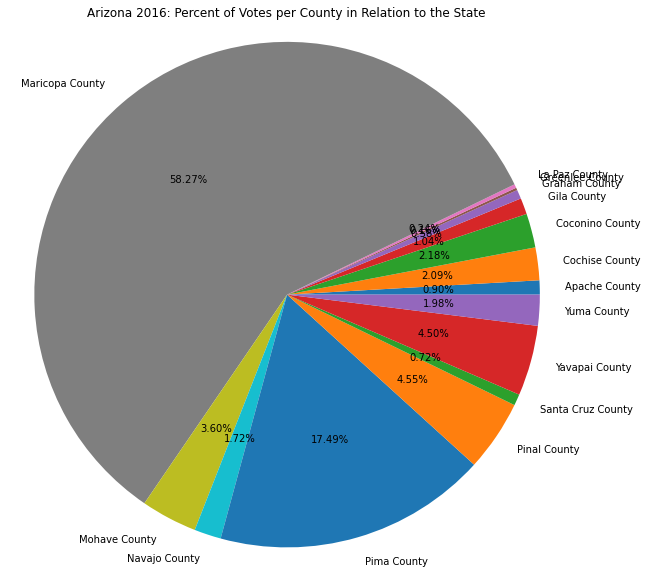

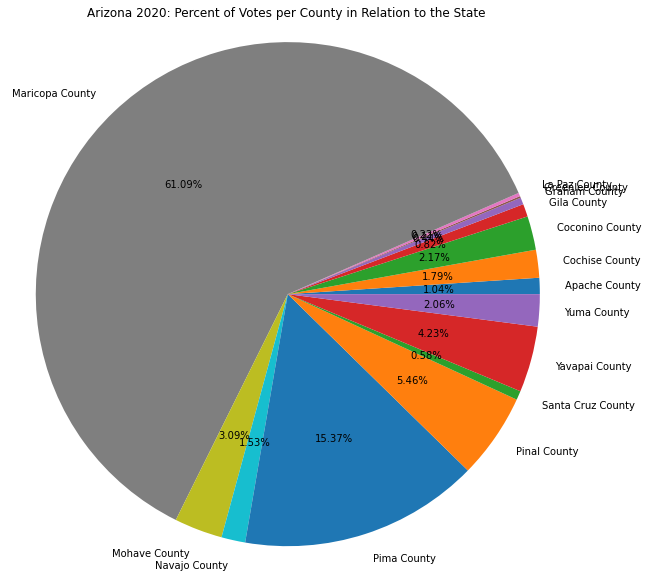

The 2016 county rankings are:
Maricopa County: 58.27%
Pima County: 17.49%
Pinal County: 4.55%
Yavapai County: 4.5%
Mohave County: 3.6%
Coconino County: 2.18%
Cochise County: 2.09%
Yuma County: 1.98%
Navajo County: 1.72%
Gila County: 1.04%
Apache County: 0.9%
Santa Cruz County: 0.72%
Graham County: 0.58%
La Paz County: 0.24%
Greenlee County: 0.16%



The 2020 county rankings are:
Maricopa County: 61.09%
Pima County: 15.37%
Pinal County: 5.46%
Yavapai County: 4.23%
Mohave County: 3.09%
Coconino County: 2.17%
Yuma County: 2.06%
Cochise County: 1.79%
Navajo County: 1.53%
Apache County: 1.04%
Gila County: 0.82%
Santa Cruz County: 0.58%
Graham County: 0.44%
La Paz County: 0.22%
Greenlee County: 0.11%


In [191]:
# Visualizing the Percent Voter Column - 2016
plt.figure(figsize=(10,10))

plt.pie(AZ_data_2016['percent_votes'], labels = AZ_data_2016['county_name'], autopct='%1.2f%%')

plt.title('Arizona 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()

AZ_data_2016 = AZ_data_2016.sort_values(by=['percent_votes'], ascending=False)

# Visualizing the Percent Voter Column - 2020
plt.figure(figsize=(10,10))

plt.pie(AZ_data_2020['percent_votes'], labels = AZ_data_2020['county_name'], autopct='%1.2f%%')

plt.title('Arizona 2020: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()

AZ_data_2020 = AZ_data_2020.sort_values(by=['percent_votes'], ascending=False)

print('The 2016 county rankings are:')
for index, row in AZ_data_2016.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")
    
print('\n\n')
print('The 2020 county rankings are:')
for index, row in AZ_data_2020.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")

The most interesting piece of information between the two elections is that Arizona in total went from having 2062810 votes in 2016 to 3387326 in 2020. This is almost a whopping 70% increase in votes. Surprisingly, the top vote collector between 2016 and 2020, Maricopa county, the county with Arizona's capital and largest city, Pheonix, increased in voter population percent in regards to the state.

## Georgia


### 2016 and 2020 Election Georgia Percent Votes Column

In [192]:
# Total state vote, print, explanation
total_GA_vote_2016 = int(GA_data_2016['total_votes'].sum())
print(total_GA_vote_2016)

total_GA_vote_2020 = GA_data_2020['total_votes'].sum()
print(total_GA_vote_2020)

4029564
4997716


The state of Georgia had a total of 4029564 votes during the 2016 Election.

The state of Georgia had a total of 4997716 votes during the 2020 Election.

In [193]:
# Create row (i.e. insert data)
for index, row in GA_data_2016.iterrows():
    GA_data_2016.loc[:, 'percent_votes'] = GA_data_2016.loc[:, 'total_votes']/total_GA_vote_2016
    
for index, row in GA_data_2020.iterrows():
    GA_data_2020.loc[:,'percent_votes'] = GA_data_2020.loc[:,'total_votes']/total_GA_vote_2020

### 2016 and 2020 Election Georgia Percent Votes Visualization

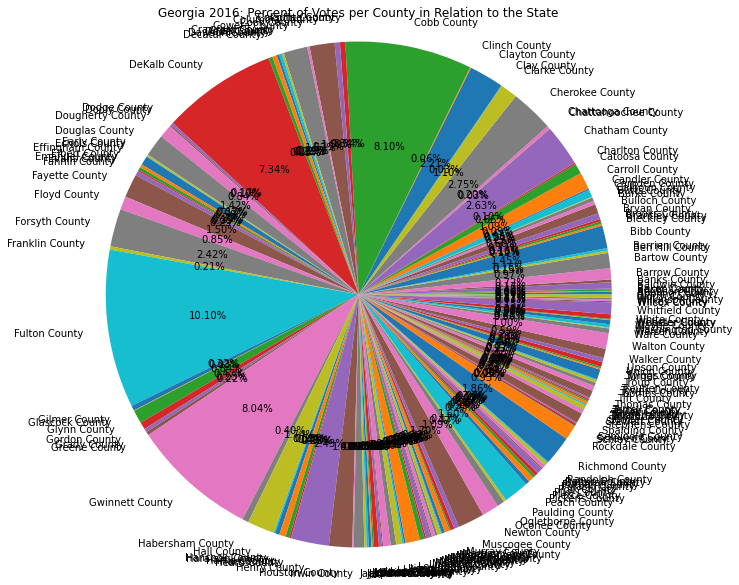

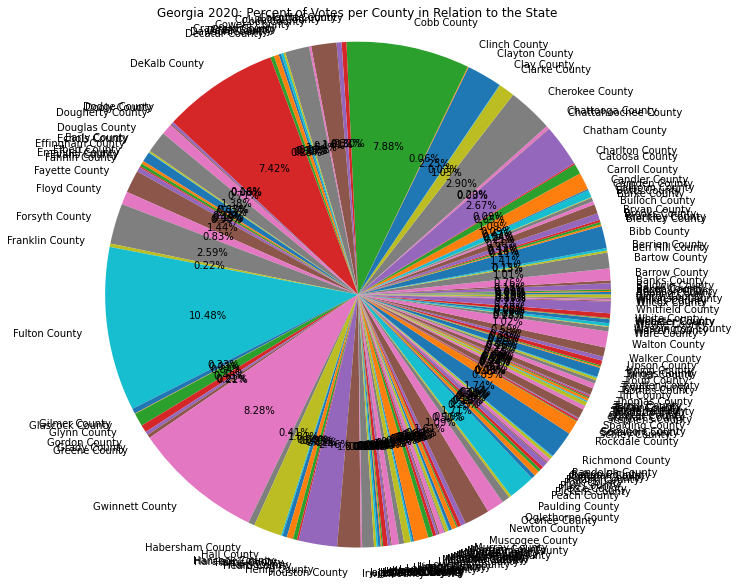

The 2016 county rankings are:
Fulton County: 10.1%
Cobb County: 8.1%
Gwinnett County: 8.04%
DeKalb County: 7.34%
Cherokee County: 2.75%
Chatham County: 2.63%
Henry County: 2.43%
Forsyth County: 2.42%
Clayton County: 2.21%
Richmond County: 1.86%
Hall County: 1.74%
Muscogee County: 1.7%
Paulding County: 1.6%
Columbia County: 1.59%
Coweta County: 1.52%
Fayette County: 1.5%
Houston County: 1.48%
Bibb County: 1.45%
Douglas County: 1.42%
Clarke County: 1.1%
Newton County: 1.09%
Carroll County: 1.09%
Walton County: 1.0%
Bartow County: 0.97%
Rockdale County: 0.93%
Lowndes County: 0.91%
Floyd County: 0.85%
Glynn County: 0.84%
Dougherty County: 0.84%
Whitfield County: 0.75%
Barrow County: 0.72%
Jackson County: 0.67%
Catoosa County: 0.66%
Spalding County: 0.64%
Troup County: 0.64%
Bulloch County: 0.6%
Walker County: 0.59%
Effingham County: 0.58%
Laurens County: 0.48%
Oconee County: 0.47%
Gordon County: 0.47%
Camden County: 0.47%
Thomas County: 0.46%
Harris County: 0.41%
Habersham County: 0.4%
Lib

In [194]:
# Visualizing the Percent Voter Column - 2016
plt.figure(figsize=(10,10))
plt.pie(GA_data_2016['percent_votes'], labels=GA_data_2016['county_name'], autopct='%1.2f%%')
plt.title('Georgia 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()
    
GA_data_2016 = GA_data_2016.sort_values(by=['percent_votes'], ascending=False)

# Visualizing the Percent Voter Column - 2020
plt.figure(figsize=(10,10))

plt.pie(GA_data_2020['percent_votes'], labels = GA_data_2020['county_name'], autopct='%1.2f%%')

plt.title('Georgia 2020: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()

GA_data_2020 = GA_data_2020.sort_values(by=['percent_votes'], ascending=False)

print('The 2016 county rankings are:')
for index, row in GA_data_2016.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")
    
print('\n\n')
print('The 2020 county rankings are:')
for index, row in GA_data_2020.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")


The counties that have the highest percentages are the counties with heavily populated cities. These are nearest to Atlanta. Georgia also experienced an increase in votes, gaining one million votes between the elections.

## Michigan

### 2016 and 2020 Election Michigan Percent Votes Column

In [195]:
# Total state vote, print, explanation
total_MI_vote_2016 = int(MI_data_2016['total_votes'].sum())
print(total_MI_vote_2016)

# Total state vote, print, explanation
total_MI_vote_2020 = MI_data_2020['total_votes'].sum()
print(total_MI_vote_2020)

4790917
5539302


The state of Michigan had a total of 4790917 votes during the 2016 election.

The state of Michigan had a total of 5539302 votes during the 2020 election.

In [196]:
# Create row (i.e. insert data)
for index, row in MI_data_2016.iterrows():
    MI_data_2016.loc[:, 'percent_votes'] = MI_data_2016.loc[:,'total_votes']/total_MI_vote_2016

for index, row in MI_data_2020.iterrows():
    MI_data_2020.loc[:, 'percent_votes'] = MI_data_2020.loc[:,'total_votes']/total_MI_vote_2020

### 2016 and 2020 Election Michigan Percent Votes Visualization

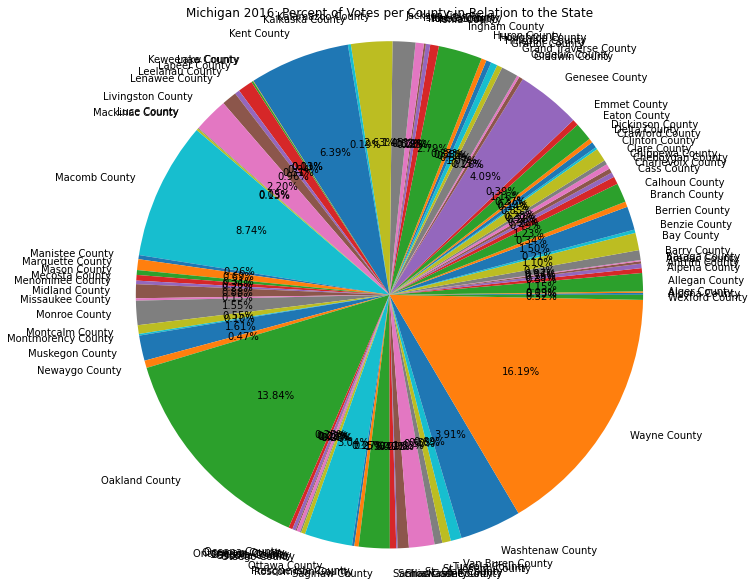

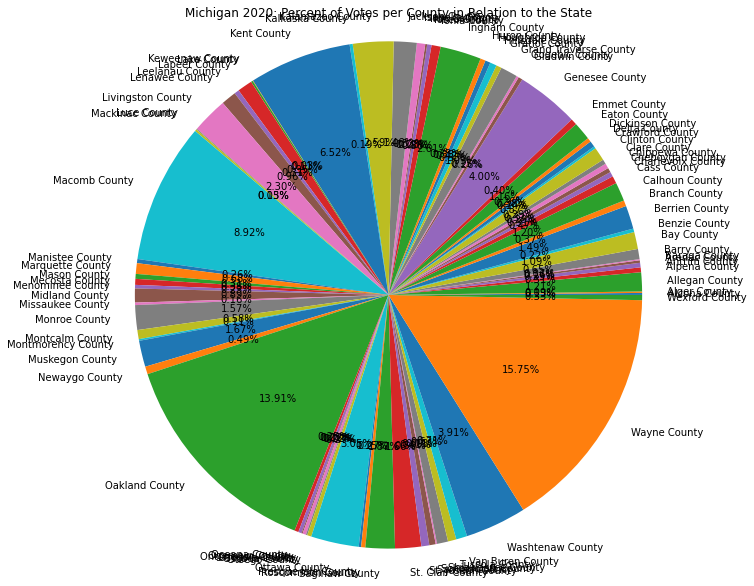

The 2016 county rankings are:
Wayne County: 16.19%
Oakland County: 13.84%
Macomb County: 8.74%
Kent County: 6.39%
Genesee County: 4.09%
Washtenaw County: 3.91%
Ottawa County: 3.04%
Ingham County: 2.79%
Kalamazoo County: 2.63%
Livingston County: 2.2%
Saginaw County: 1.97%
St. Clair County: 1.63%
Muskegon County: 1.61%
Monroe County: 1.55%
Berrien County: 1.5%
Jackson County: 1.45%
Calhoun County: 1.23%
Eaton County: 1.16%
Allegan County: 1.15%
Bay County: 1.1%
Grand Traverse County: 1.07%
Lenawee County: 0.96%
Lapeer County: 0.94%
Midland County: 0.88%
Clinton County: 0.85%
Shiawassee County: 0.71%
Van Buren County: 0.69%
Marquette County: 0.69%
Barry County: 0.63%
Montcalm County: 0.55%
Ionia County: 0.55%
Tuscola County: 0.55%
Isabella County: 0.53%
St. Joseph County: 0.5%
Cass County: 0.49%
Newaygo County: 0.47%
Hillsdale County: 0.41%
Sanilac County: 0.4%
Emmet County: 0.39%
Delta County: 0.39%
Mecosta County: 0.36%
Branch County: 0.34%
Gratiot County: 0.34%
Huron County: 0.33%
Houg

In [197]:
# Visualizing the Percent Voter Column - 2016
plt.figure(figsize=(10,10))
plt.pie(MI_data_2016['percent_votes'], labels=MI_data_2016['county_name'], autopct='%1.2f%%')
plt.title('Michigan 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()
    
MI_data_2016 = MI_data_2016.sort_values(by=['percent_votes'], ascending=False)

# Visualizing the Percent Voter Column - 2020
plt.figure(figsize=(10,10))

plt.pie(MI_data_2020['percent_votes'], labels = MI_data_2020['county_name'], autopct='%1.2f%%')

plt.title('Michigan 2020: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()

MI_data_2020 = MI_data_2020.sort_values(by=['percent_votes'], ascending=False)

print('The 2016 county rankings are:')
for index, row in MI_data_2016.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")
    
print('\n\n')
print('The 2020 county rankings are:')
for index, row in MI_data_2020.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")


Michigan also experienced an increase in votes of around 800k between the two elections. The majoritiy of the votes come from the Detroit area. 

## Pennsylvania
### 2016 and 2020 Election Pennsylvania Percent Votes Column

In [198]:
# Total state vote, print, explanation
total_PA_vote_2016 = int(PA_data_2016['total_votes'].sum())
print(total_PA_vote_2016)

total_PA_vote_2020 = int(PA_data_2020['total_votes'].sum())
print(total_PA_vote_2020)

5970107
6925255


The state of Pennsylvania had a total of 5970107 votes during the 2016 election.

The state of Pennsylvania had a total of 6925255 votes during the 2020 election.

In [199]:
# Create row (i.e. insert data)
for index, row in PA_data_2016.iterrows():
    PA_data_2016.loc[:, 'percent_votes'] = PA_data_2016.loc[:,'total_votes']/total_PA_vote_2016
    
for index, row in PA_data_2020.iterrows():
    PA_data_2020.loc[:, 'percent_votes'] = PA_data_2020.loc[:,'total_votes']/total_PA_vote_2020

### 2016 and 2020 Election Pennsylvania Percent Votes Visualization

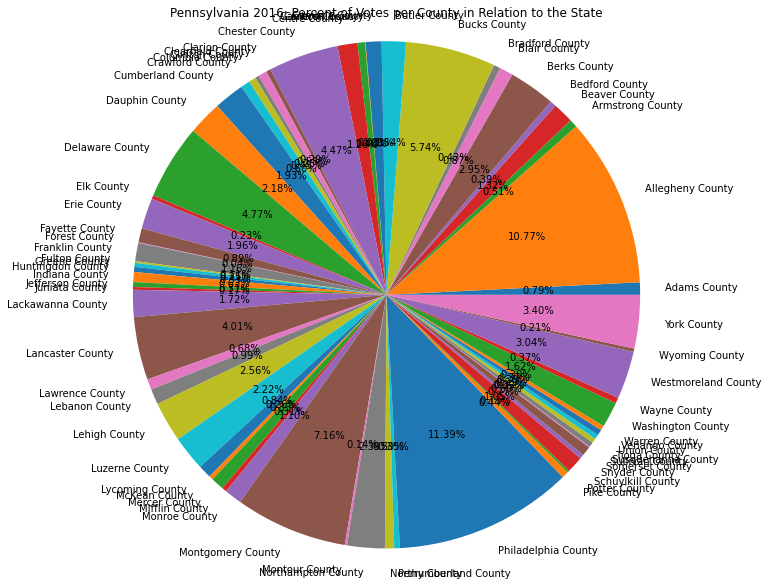

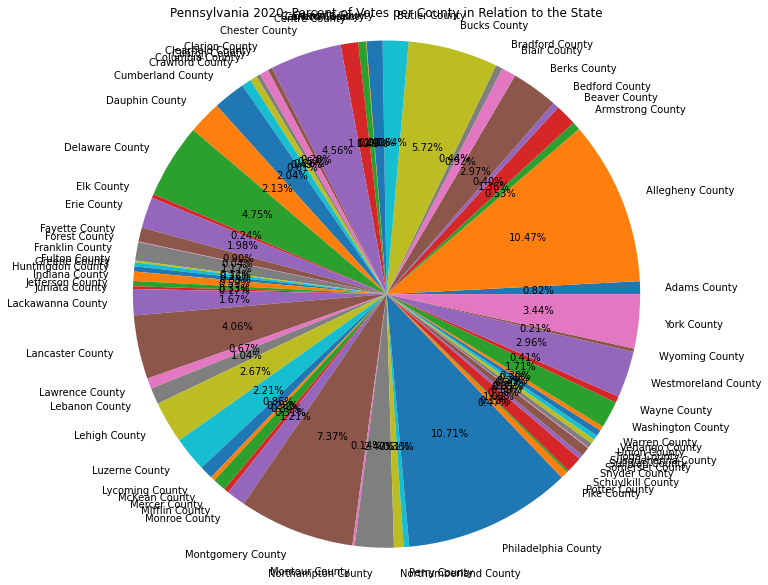

The 2016 county rankings are:
Philadelphia County: 11.39%
Allegheny County: 10.77%
Montgomery County: 7.16%
Bucks County: 5.74%
Delaware County: 4.77%
Chester County: 4.47%
Lancaster County: 4.01%
York County: 3.4%
Westmoreland County: 3.04%
Berks County: 2.95%
Lehigh County: 2.56%
Northampton County: 2.39%
Luzerne County: 2.22%
Dauphin County: 2.18%
Erie County: 1.96%
Cumberland County: 1.93%
Lackawanna County: 1.72%
Washington County: 1.62%
Butler County: 1.54%
Beaver County: 1.32%
Centre County: 1.26%
Franklin County: 1.16%
Monroe County: 1.1%
Schuylkill County: 1.05%
Cambria County: 1.01%
Lebanon County: 0.99%
Fayette County: 0.89%
Blair County: 0.87%
Lycoming County: 0.84%
Mercer County: 0.83%
Adams County: 0.79%
Lawrence County: 0.68%
Indiana County: 0.63%
Somerset County: 0.6%
Crawford County: 0.6%
Northumberland County: 0.59%
Clearfield County: 0.55%
Armstrong County: 0.51%
Carbon County: 0.48%
Columbia County: 0.45%
Pike County: 0.44%
Bradford County: 0.43%
Bedford County: 0.3

In [200]:
# Creating plot and printing percent 
plt.figure(figsize=(10,10))
plt.pie(PA_data_2016['percent_votes'], labels=PA_data_2016['county_name'], autopct='%1.2f%%')
plt.title('Pennsylvania 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()

    
PA_data_2016 = PA_data_2016.sort_values(by=['percent_votes'], ascending=False)

# Visualizing the Percent Voter Column - 2020
plt.figure(figsize=(10,10))

plt.pie(PA_data_2020['percent_votes'], labels = PA_data_2020['county_name'], autopct='%1.2f%%')

plt.title('Pennsylvania 2020: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()

PA_data_2020 = PA_data_2020.sort_values(by=['percent_votes'], ascending=False)

print('The 2016 county rankings are:')
for index, row in PA_data_2016.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")
    
print('\n\n')
print('The 2020 county rankings are:')
for index, row in PA_data_2020.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")


Pennsylvania had an increase of about 1 million votes between the elections and its biggest cities, Philadelphia and Pittsburgh had the largest influence in the election.

## Wisconsin

### 2016 and 2020 Election Wisconsin Percent Votes Column


In [201]:
# Total state vote, print, explanation
total_WI_vote_2016 = int(WI_data_2016['total_votes'].sum())
print(total_WI_vote_2016)

total_WI_vote_2020 = WI_data_2020['total_votes'].sum()
print(total_WI_vote_2020)

2937326
3297352


The state of Wisconsin had a total of 2937326 votes during the 2016 Election. 

The state of Wisconsin had a total of 3297352 votes during the 2020 Election. 

In [202]:
# Create row (i.e. insert data)
for index, row in WI_data_2016.iterrows():
    WI_data_2016.loc[:, 'percent_votes'] = WI_data_2016.loc[:,'total_votes']/total_WI_vote_2016

for index, row in WI_data_2020.iterrows():
    WI_data_2020.loc[:, 'percent_votes'] = WI_data_2020.loc[:,'total_votes']/total_WI_vote_2020

### 2016 and 2020 Election Wisconsin Percent Votes Visualization

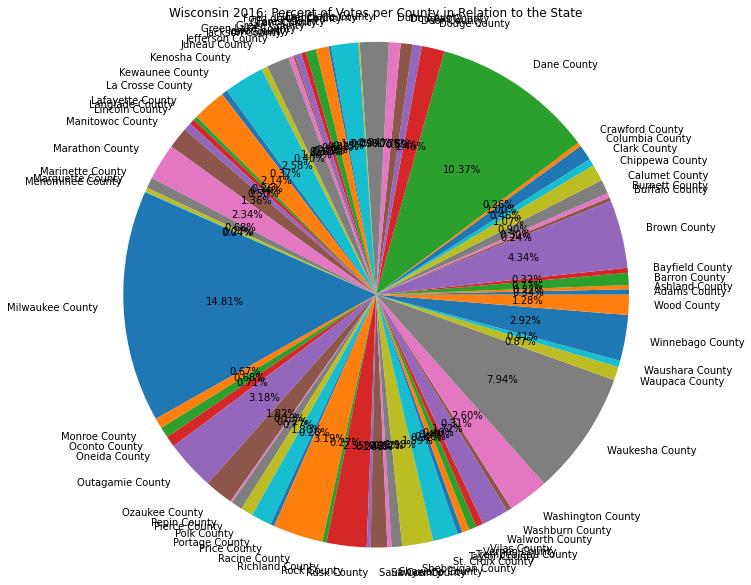

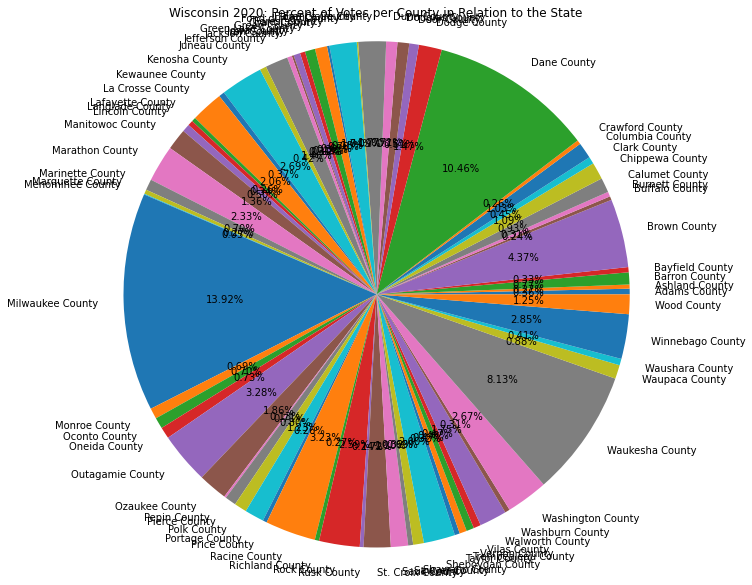

The 2016 county rankings are:
Milwaukee County: 14.81%
Dane County: 10.37%
Waukesha County: 7.94%
Brown County: 4.34%
Racine County: 3.19%
Outagamie County: 3.18%
Winnebago County: 2.92%
Washington County: 2.6%
Kenosha County: 2.58%
Rock County: 2.55%
Marathon County: 2.34%
La Crosse County: 2.14%
Sheboygan County: 1.98%
Eau Claire County: 1.84%
Ozaukee County: 1.82%
Fond du Lac County: 1.74%
Walworth County: 1.72%
St. Croix County: 1.59%
Dodge County: 1.46%
Jefferson County: 1.44%
Manitowoc County: 1.36%
Portage County: 1.3%
Wood County: 1.28%
Chippewa County: 1.07%
Sauk County: 1.06%
Columbia County: 1.0%
Calumet County: 0.9%
Waupaca County: 0.87%
Grant County: 0.82%
Polk County: 0.77%
Barron County: 0.77%
Douglas County: 0.76%
Dunn County: 0.75%
Pierce County: 0.72%
Oneida County: 0.71%
Marinette County: 0.68%
Oconto County: 0.68%
Shawano County: 0.67%
Monroe County: 0.67%
Green County: 0.64%
Door County: 0.59%
Lincoln County: 0.5%
Vernon County: 0.48%
Trempealeau County: 0.46%
Clar

In [203]:
# Creating plot and printing percent
plt.figure(figsize=(10,10))
plt.pie(WI_data_2016['percent_votes'], labels=WI_data_2016['county_name'], autopct='%1.2f%%')
plt.title('Wisconsin 2016: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()
    
WI_data_2016 = WI_data_2016.sort_values(by=['percent_votes'], ascending=False)

# Visualizing the Percent Voter Column - 2020
plt.figure(figsize=(10,10))

plt.pie(WI_data_2020['percent_votes'], labels = WI_data_2020['county_name'], autopct='%1.2f%%')

plt.title('Wisconsin 2020: Percent of Votes per County in Relation to the State')
plt.axis('equal')
plt.show()

WI_data_2020 = WI_data_2020.sort_values(by=['percent_votes'], ascending=False)

print('The 2016 county rankings are:')
for index, row in WI_data_2016.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")
    
print('\n\n')
print('The 2020 county rankings are:')
for index, row in WI_data_2020.iterrows():
    print(row['county_name'] + ": " + str(round(row['percent_votes']*100, 2)) + "%")


Wisconsin had a smaller increase in total votes between the years. Its cities of Madison and Milwaukee are the biggest population centers and hold a great deal of influence.

# Scraping Data and Collecting County Population

After finding the percentage of the votes in relation to the state for each county and visualizing the pie chart, we are now interested in looking at the distribution of our data in relation to the total population of the state. We will be pulling Census data for the five states we are interested in. The data is a collection of information from the years 2010-2019, but we will drop the other years that we do not need, because we are specifically paying attention to the 2016 election and 2020 elections. Because we do not have data for 2020, we will use the 2019 number. 

Now, we will scrape the csv's and create dataframes for each state for the total population per county.

## Arizona Population Data 2016 and 2020


In [204]:
arizonaPop = pd.read_csv('changeInPop/arizona.csv')
arizonaPop.rename(columns = {'Unnamed: 0': 'County/State'}, inplace=True)
arizonaPop = arizonaPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', 'Census', 'Estimates Base'], axis=1)
arizonaPop

County/State       2016       2019
0                      Arizona  6,941,072  7,278,717
1       Apache County, Arizona     71,381     71,887
2      Cochise County, Arizona    125,686    125,922
3     Coconino County, Arizona    140,407    143,476
4         Gila County, Arizona     53,356     54,018
5       Graham County, Arizona     37,807     38,837
6     Greenlee County, Arizona      9,643      9,498
7       La Paz County, Arizona     20,648     21,108
8     Maricopa County, Arizona  4,256,143  4,485,414
9       Mohave County, Arizona    205,412    212,181
10      Navajo County, Arizona    108,467    110,924
11        Pima County, Arizona  1,016,707  1,047,279
12       Pinal County, Arizona    417,193    462,789
13  Santa Cruz County, Arizona     46,400     46,498
14     Yavapai County, Arizona    224,575    235,099
15        Yuma County, Arizona    207,247    213,787

## Georgia Population Data 2016 and 2020

In [205]:
georgiaPop = pd.read_csv('changeInPop/georgia.csv')
georgiaPop.rename(columns={'Unnamed: 0': 'County/State'}, inplace=True)
georgiaPop = georgiaPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', 'Census', 'Estimates Base'], axis=1)
georgiaPop

County/State        2016        2019
0                      Georgia  10,301,890  10,617,423
1      Appling County, Georgia      18,428      18,386
2     Atkinson County, Georgia       8,244       8,165
3        Bacon County, Georgia      11,275      11,164
4        Baker County, Georgia       3,183       3,038
..                         ...         ...         ...
155  Whitfield County, Georgia     104,406     104,628
156     Wilcox County, Georgia       8,841       8,635
157     Wilkes County, Georgia       9,809       9,777
158  Wilkinson County, Georgia       9,020       8,954
159      Worth County, Georgia      20,703      20,247

[160 rows x 3 columns]

## Michigan Population Data 2016 and 2020

In [206]:
michiganPop = pd.read_csv('changeInPop/michigan.csv')
michiganPop.rename(columns={'Unnamed: 0': 'County/State'}, inplace=True)
michiganPop = michiganPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', 'Census', 'Estimates Base'], axis=1)
michiganPop

County/State       2016       2019
0                     Michigan  9,950,571  9,986,857
1      Alcona County, Michigan     10,360     10,405
2       Alger County, Michigan      9,129      9,108
3     Allegan County, Michigan    114,979    118,081
4      Alpena County, Michigan     28,663     28,405
..                         ...        ...        ...
79    Tuscola County, Michigan     53,276     52,245
80  Van Buren County, Michigan     75,267     75,677
81  Washtenaw County, Michigan    366,135    367,601
82      Wayne County, Michigan  1,760,612  1,749,343
83    Wexford County, Michigan     33,081     33,631

[84 rows x 3 columns]

## Pennsylvania Population Data 2016 and 2020

In [207]:
pennsylvaniaPop = pd.read_csv('changeInPop/pennsylvania.csv')
pennsylvaniaPop.rename(columns={'Unnamed: 0': 'County/State'}, inplace=True)
pennsylvaniaPop = pennsylvaniaPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', 'Census', 'Estimates Base'], axis=1)
pennsylvaniaPop

County/State        2016        2019
0                        Pennsylvania  12,782,275  12,801,989
1          Adams County, Pennsylvania     101,911     103,009
2      Allegheny County, Pennsylvania   1,226,426   1,216,045
3      Armstrong County, Pennsylvania      66,397      64,735
4         Beaver County, Pennsylvania     166,758     163,929
..                                ...         ...         ...
63    Washington County, Pennsylvania     207,386     206,865
64         Wayne County, Pennsylvania      51,339      51,361
65  Westmoreland County, Pennsylvania     354,665     348,899
66       Wyoming County, Pennsylvania      27,546      26,794
67          York County, Pennsylvania     443,693     449,058

[68 rows x 3 columns]

## Wisconsin Population Data 2016 and 2020

In [208]:
wisconsinPop = pd.read_csv('changeInPop/wisconsin.csv')
wisconsinPop.rename(columns={'Unnamed: 0': 'County/State'}, inplace=True)
wisconsinPop = wisconsinPop.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', 'Census', 'Estimates Base'], axis=1)
wisconsinPop

County/State       2016       2019
0                     Wisconsin  5,772,628  5,822,434
1       Adams County, Wisconsin     19,982     20,220
2     Ashland County, Wisconsin     15,633     15,562
3      Barron County, Wisconsin     45,242     45,244
4    Bayfield County, Wisconsin     14,923     15,036
..                          ...        ...        ...
68   Waukesha County, Wisconsin    398,521    404,198
69    Waupaca County, Wisconsin     51,306     50,990
70   Waushara County, Wisconsin     24,103     24,443
71  Winnebago County, Wisconsin    169,629    171,907
72       Wood County, Wisconsin     73,219     72,999

[73 rows x 3 columns]

# Visualization of each state & its counties for voter turnout in 2016 and 2020

We would now like to visualize the voter turnout in 2016 and 2020. To do this, we will use the Census data that was extracted above, and see the percentage of people living in each county that voted. We will take the 'total_votes' from the 2016 and 2020 election data table, and divide that by the total population of that county in order to receive our final value.

We first need to use Regex and other techniques in order to merge the two tables together in order to receive the information that we need overall.

One thing to note is that when we were merging the tables together and creating a 'Voter Turnout' column, we needed to convert the '2016 County Population' values to floats due to the fact that they had commas. After this, we can divide the total votes of each county by the county's total population in order to receive the voter turnout.

NOTE: Our voter turnout percentages include children, people who are not allowed to vote, and non-citizens in the count. For a true voter turnout, a voting age population should be used. Instead, this is more of a percentage of people who vote rather than a voter turnout.

## Arizona Voter Turnout 2016 and 2020

In [209]:
# Editing the 'arizonaPop' table so that the county's are standalone
import re 

arizonaPop['county_name'] = arizonaPop['County/State'].str.extract(r'([a-zA-Z]*\s*[a-zA-Z]*\s*County)')
arizonaPop = arizonaPop.drop(columns=['County/State'], axis=1)

After using regex in order to extract just the county names for each entry, with the first entry in the table being the state totals itself (that is why it comes up as NaN), we then rearrange the rows in order to make the dataframe look organized, with the county names at the front of the table.

After rearranging the data, we can now go about merging our two tables together in order to create a visualization of the voter turnout.


In [210]:
# Moving the Columns around in order for the County Names to be shown first
cols = arizonaPop.columns.tolist()
cols = cols[-1:]  + cols[:-1]
arizonaPop = arizonaPop[cols]

In [211]:
# Creating merged table and dropping appropriate columns to make data look good
merged_arizona_data = pd.merge(left=AZ_data_2016, right=arizonaPop, on='county_name')
merged_arizona_data.rename(columns={'2019': '2020 County Population', '2016': '2016 County Population', 'state_abbr': 
                                    'State Abbrev.', 'total_votes': '2016 Vote Count'}, inplace=True)


no_need_2016 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 
           'diff', 'per_point_diff', 'combined_fips', 'percent_votes']
no_need_2020 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 'diff', 'per_point_diff', 'State Abbrev.', 'percent_votes']


merged_arizona_data = merged_arizona_data.drop(columns=no_need_2016, axis=1)
merged_arizona_data = pd.merge(left=AZ_data_2020, right=merged_arizona_data, on='county_name')
merged_arizona_data = merged_arizona_data.drop(columns=no_need_2020, axis=1)

merged_arizona_data.rename(columns={'total_votes': '2020 Vote Count'}, inplace=True)
merged_arizona_data.rename(columns={'county_name': 'County Name'}, inplace=True)

merged_arizona_data = merged_arizona_data[['state_name', 'County Name', 'county_fips', '2016 Vote Count',
                                           '2020 Vote Count', '2016 County Population', '2020 County Population']]
# converting 2016 County Population values from string to float
convert = merged_arizona_data['2016 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_arizona_data = merged_arizona_data.drop(columns='2016 County Population', axis=1)
merged_arizona_data['2016 County Population'] = convert

convert = merged_arizona_data['2020 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_arizona_data = merged_arizona_data.drop(columns='2020 County Population', axis=1)
merged_arizona_data['2020 County Population'] = convert

# Calculation of voter turnout percentage
voter_turnout_2016 = []
for i, r in merged_arizona_data.iterrows():
    voter_turnout_2016.append(r['2016 Vote Count']/r['2016 County Population'])
merged_arizona_data['2016 Voter Turnout'] = voter_turnout_2016

voter_turnout_2020 = []
for i, r in merged_arizona_data.iterrows():
    voter_turnout_2020.append(r['2020 Vote Count']/r['2020 County Population'])
merged_arizona_data['2020 Voter Turnout'] = voter_turnout_2020

merged_arizona_data

state_name        County Name  county_fips  2016 Vote Count  \
0     Arizona    Maricopa County         4013        1201934.0   
1     Arizona        Pima County         4019         360762.0   
2     Arizona       Pinal County         4021          93805.0   
3     Arizona     Yavapai County         4025          92780.0   
4     Arizona      Mohave County         4015          74189.0   
5     Arizona    Coconino County         4005          44929.0   
6     Arizona        Yuma County         4027          40759.0   
7     Arizona     Cochise County         4003          43147.0   
8     Arizona      Navajo County         4017          35409.0   
9     Arizona      Apache County         4001          18659.0   
10    Arizona        Gila County         4007          21398.0   
11    Arizona  Santa Cruz County         4023          14926.0   
12    Arizona      Graham County         4009          11939.0   
13    Arizona      La Paz County         4012           4931.0   
14    Arizona    Greenlee County         4011           3243.0   

    2020 Vote Count  2016 County Population  2020 County Population  \
0           2069475               4256143.0               4485414.0   
1            520735               1016707.0               1047279.0   
2            185037                417193.0                462789.0   
3            143280                224575.0                235099.0   
4            104705                205412.0                212181.0   
5             73346                140407.0                143476.0   
6             69926                207247.0                213787.0   
7             60473                125686.0                125922.0   
8             51783                108467.0                110924.0   
9             35183                 71381.0                 71887.0   
10            27678                 53356.0                 54018.0   
11            19561                 46400.0                 46498.0   
12            14996                 37807.0                 38837.0   
13             7460                 20648.0                 21108.0   
14             3688                  9643.0                  9498.0   

    2016 Voter Turnout  2020 Voter Turnout  
0             0.282400            0.461379  
1             0.354834            0.497227  
2             0.224848            0.399830  
3             0.413136            0.609445  
4             0.361172            0.493470  
5             0.319991            0.511207  
6             0.196669            0.327083  
7             0.343292            0.480242  
8             0.326450            0.466833  
9             0.261400            0.489421  
10            0.401042            0.512385  
11            0.321681            0.420685  
12            0.315788            0.386127  
13            0.238812            0.353421  
14            0.336306            0.388292

County Name:	2016		2020
Maricopa County: 28.24%		46.14%
Pima County: 35.48%		49.72%
Pinal County: 22.48%		39.98%
Yavapai County: 41.31%		60.94%
Mohave County: 36.12%		49.35%
Coconino County: 32.0%		51.12%
Yuma County: 19.67%		32.71%
Cochise County: 34.33%		48.02%
Navajo County: 32.64%		46.68%
Apache County: 26.14%		48.94%
Gila County: 40.1%		51.24%
Santa Cruz County: 32.17%		42.07%
Graham County: 31.58%		38.61%
La Paz County: 23.88%		35.34%
Greenlee County: 33.63%		38.83%


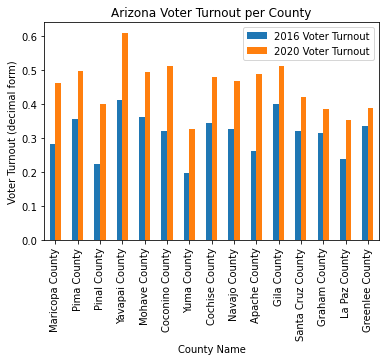

In [212]:
# Creating a visualization for the voter turnout data 
merged_arizona_data.plot(x="County Name", y=["2016 Voter Turnout", "2020 Voter Turnout"], kind="bar", 
                         title='Arizona Voter Turnout per County', ylabel='Voter Turnout (decimal form)')
print('County Name:\t2016\t\t2020')
for i, r in merged_arizona_data.iterrows():
    print(r['County Name'] + ": " + str(round(r['2016 Voter Turnout']*100, 2)) + "%" + '\t\t'+ str(round(r['2020 Voter Turnout']*100, 2)) + "%")

## Georgia Voter Turnout 2016 and 2020



In [213]:
georgiaPop['county_name'] = georgiaPop['County/State'].str.extract(r'([a-zA-Z]*\s*[a-zA-Z]*\s*County)')
georgiaPop = georgiaPop.drop(columns=['County/State'], axis=1)
cols = georgiaPop.columns.tolist()
cols = cols[-1:]  + cols[:-1]
georgiaPop = georgiaPop[cols]

In [214]:
# Creating merged table and dropping appropriate columns to make data look good
merged_georgia_data = pd.merge(left=GA_data_2016, right=georgiaPop, on='county_name')
merged_georgia_data.rename(columns={'2019': '2020 County Population', '2016': '2016 County Population', 'state_abbr': 
                                    'State Abbrev.', 'total_votes': '2016 Vote Count'}, inplace=True)


no_need_2016 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 
           'diff', 'per_point_diff', 'combined_fips', 'percent_votes']
no_need_2020 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 'diff', 'per_point_diff', 'State Abbrev.', 'percent_votes']


merged_georgia_data = merged_georgia_data.drop(columns=no_need_2016, axis=1)
merged_georgia_data = pd.merge(left=GA_data_2020, right=merged_georgia_data, on='county_name')
merged_georgia_data = merged_georgia_data.drop(columns=no_need_2020, axis=1)

merged_georgia_data.rename(columns={'total_votes': '2020 Vote Count'}, inplace=True)
merged_georgia_data.rename(columns={'county_name': 'County Name'}, inplace=True)

merged_georgia_data = merged_georgia_data[['state_name', 'County Name', 'county_fips', '2016 Vote Count',
                                           '2020 Vote Count', '2016 County Population', '2020 County Population']]
# converting 2016 County Population values from string to float
convert = merged_georgia_data['2016 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_georgia_data = merged_georgia_data.drop(columns='2016 County Population', axis=1)
merged_georgia_data['2016 County Population'] = convert

convert = merged_georgia_data['2020 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_georgia_data = merged_georgia_data.drop(columns='2020 County Population', axis=1)
merged_georgia_data['2020 County Population'] = convert

# Calculation of voter turnout percentage
voter_turnout_2016 = []
for i, r in merged_georgia_data.iterrows():
    voter_turnout_2016.append(r['2016 Vote Count']/r['2016 County Population'])
merged_georgia_data['2016 Voter Turnout'] = voter_turnout_2016

voter_turnout_2020 = []
for i, r in merged_georgia_data.iterrows():
    voter_turnout_2020.append(r['2020 Vote Count']/r['2020 County Population'])
merged_georgia_data['2020 Voter Turnout'] = voter_turnout_2020

merged_georgia_data

state_name        County Name  county_fips  2016 Vote Count  \
0      Georgia      Fulton County        13121         407173.0   
1      Georgia    Gwinnett County        13135         323931.0   
2      Georgia        Cobb County        13067         326424.0   
3      Georgia      DeKalb County        13089         295871.0   
4      Georgia    Cherokee County        13057         110825.0   
..         ...                ...          ...              ...   
154    Georgia      Echols County        13101           1175.0   
155    Georgia        Clay County        13061           1271.0   
156    Georgia     Webster County        13307           1114.0   
157    Georgia     Quitman County        13239           1044.0   
158    Georgia  Taliaferro County        13265            897.0   

     2020 Vote Count  2016 County Population  2020 County Population  \
0             523779               1022866.0               1063937.0   
1             414023                904962.0                936250.0   
2             393728                748178.0                760141.0   
3             370746                746802.0                759297.0   
4             144815                241795.0                258773.0   
..               ...                     ...                     ...   
154             1441                  3956.0                  4006.0   
155             1435                  3005.0                  2834.0   
156             1391                  2616.0                  2607.0   
157             1106                  2320.0                  2299.0   
158              928                  1611.0                  1537.0   

     2016 Voter Turnout  2020 Voter Turnout  
0              0.398071            0.492303  
1              0.357950            0.442214  
2              0.436292            0.517967  
3              0.396184            0.488275  
4              0.458343            0.559622  
..                  ...                 ...  
154            0.297017            0.359710  
155            0.422962            0.506351  
156            0.425841            0.533563  
157            0.450000            0.481079  
158            0.556797            0.603774  

[159 rows x 9 columns]

County Name:	2016		2020
Fulton County: 39.81%		49.23%
Gwinnett County: 35.79%		44.22%
Cobb County: 43.63%		51.8%
DeKalb County: 39.62%		48.83%
Cherokee County: 45.83%		55.96%
Chatham County: 36.73%		46.09%
Forsyth County: 44.14%		52.94%
Henry County: 44.38%		52.44%
Clayton County: 31.95%		38.44%
Hall County: 35.75%		44.29%
Richmond County: 37.11%		42.96%
Paulding County: 41.61%		50.62%
Columbia County: 43.56%		51.42%
Muscogee County: 34.82%		41.13%
Coweta County: 43.64%		51.71%
Houston County: 39.28%		47.41%
Fayette County: 54.3%		62.92%
Bibb County: 38.08%		46.17%
Douglas County: 40.49%		47.22%
Carroll County: 37.69%		45.4%
Newton County: 41.11%		48.53%
Clarke County: 35.4%		40.01%
Walton County: 45.02%		54.01%
Bartow County: 37.99%		46.84%
Lowndes County: 32.19%		39.48%
Rockdale County: 42.24%		49.16%
Glynn County: 40.48%		49.23%
Floyd County: 35.42%		41.97%
Barrow County: 37.44%		45.56%
Jackson County: 41.59%		51.63%
Whitfield County: 29.08%		35.14%
Dougherty County: 37.53%		40.12%


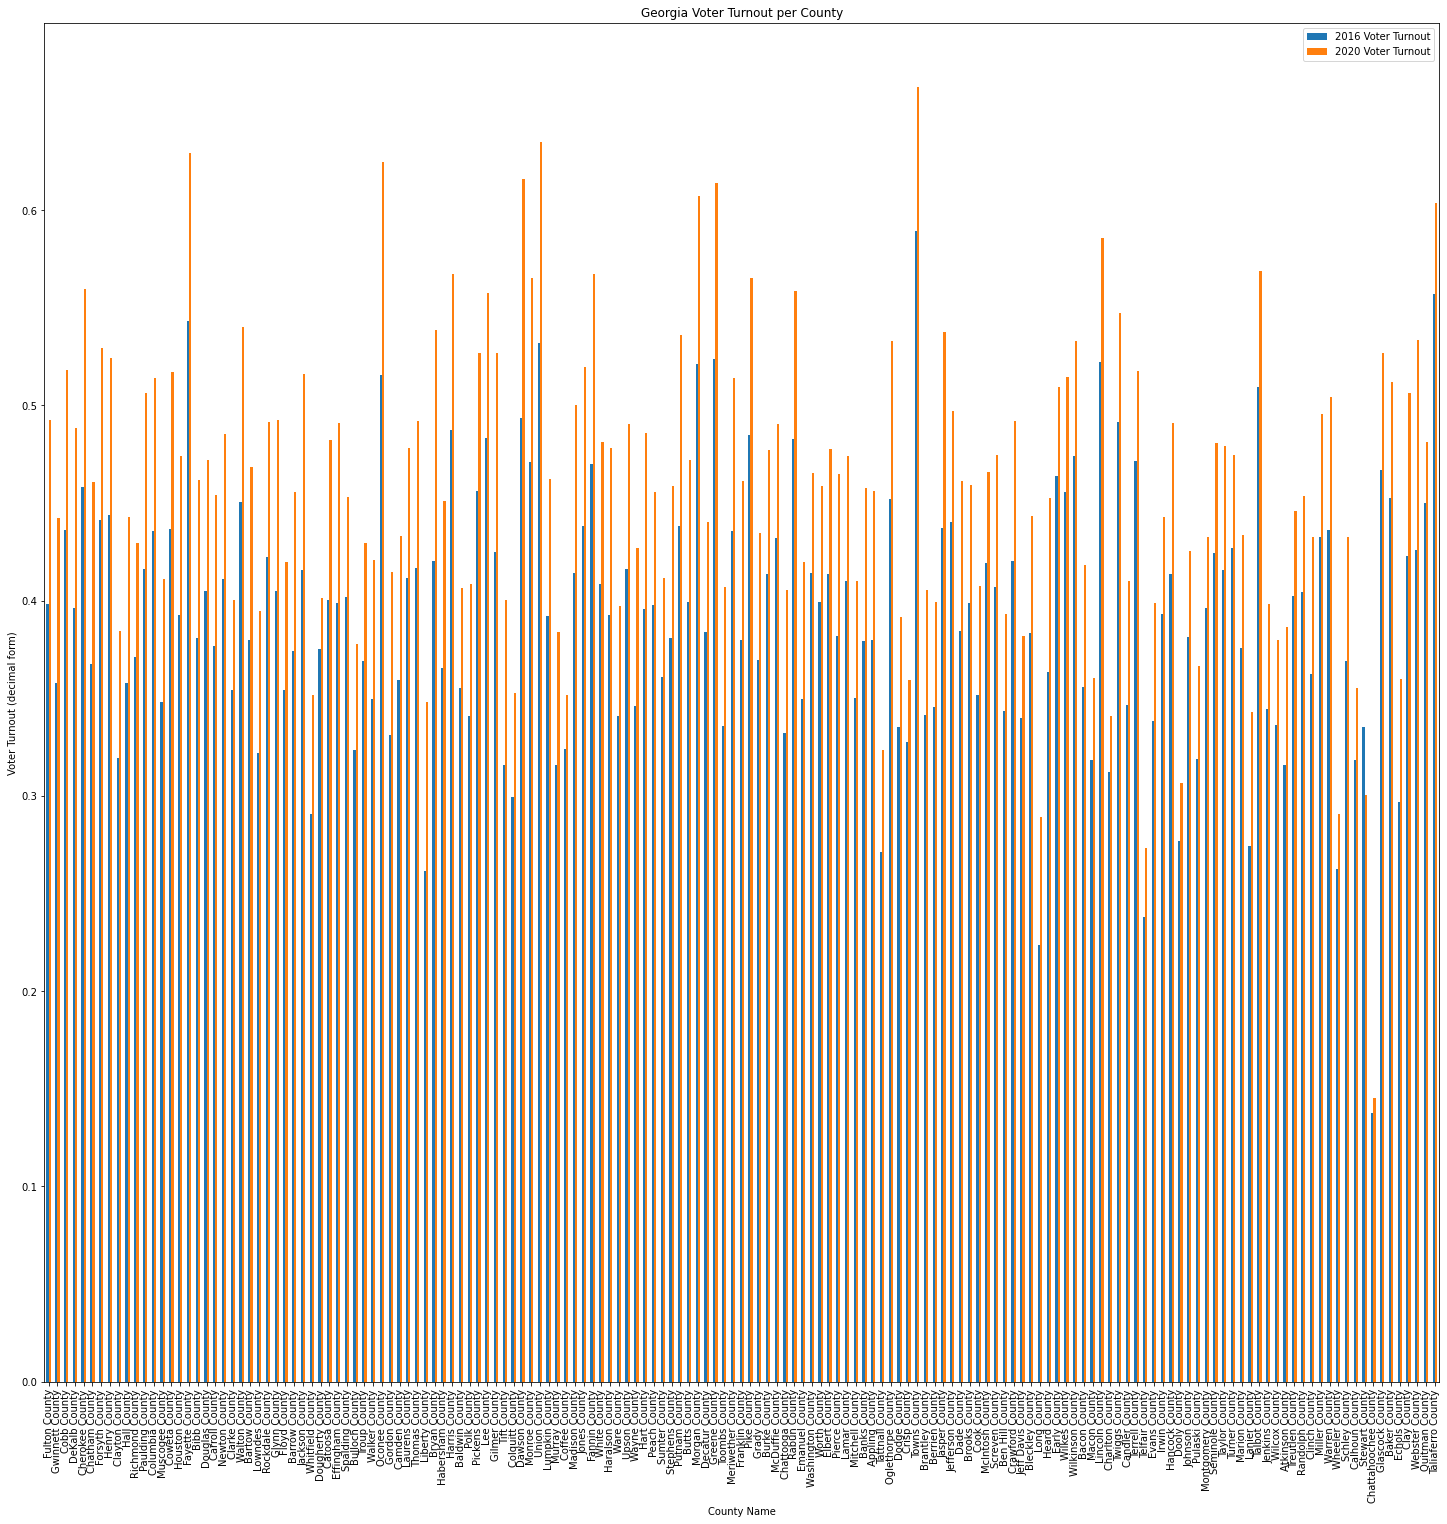

In [215]:
# Creating a visualization for the voter turnout data 
merged_georgia_data.plot(x="County Name", y=["2016 Voter Turnout", "2020 Voter Turnout"], kind="bar", 
                         title='Georgia Voter Turnout per County', ylabel='Voter Turnout (decimal form)',
                        figsize=(25,25))
print('County Name:\t2016\t\t2020')
for i, r in merged_georgia_data.iterrows():
    print(r['County Name'] + ": " + str(round(r['2016 Voter Turnout']*100, 2)) + "%" + '\t\t'+ str(round(r['2020 Voter Turnout']*100, 2)) + "%")

## Michigan Voter Turnout 2016 and 2020

In [216]:
michiganPop['county_name'] = michiganPop['County/State'].str.extract(r'([a-zA-Z]*\s*[a-zA-Z]*\s*County)')
michiganPop = michiganPop.drop(columns=['County/State'], axis=1)
cols = michiganPop.columns.tolist()
cols = cols[-1:]  + cols[:-1]
michiganPop = michiganPop[cols]

In [217]:
# Creating merged table and dropping appropriate columns to make data look good
merged_michigan_data = pd.merge(left=MI_data_2016, right=michiganPop, on='county_name')
merged_michigan_data.rename(columns={'2019': '2020 County Population', '2016': '2016 County Population', 'state_abbr': 
                                    'State Abbrev.', 'total_votes': '2016 Vote Count'}, inplace=True)
no_need_2016 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 'diff', 'per_point_diff', 'combined_fips', 'percent_votes']
no_need_2020 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 'diff', 'per_point_diff', 'State Abbrev.', 'percent_votes']


merged_michigan_data = merged_michigan_data.drop(columns=no_need_2016, axis=1)
merged_michigan_data = pd.merge(left=MI_data_2020, right=merged_michigan_data, on='county_name')
merged_michigan_data = merged_michigan_data.drop(columns=no_need_2020, axis=1)

merged_michigan_data.rename(columns={'total_votes': '2020 Vote Count'}, inplace=True)
merged_michigan_data.rename(columns={'county_name': 'County Name'}, inplace=True)

merged_michigan_data = merged_michigan_data[['state_name', 'County Name', 'county_fips', '2016 Vote Count',
                                           '2020 Vote Count', '2016 County Population', '2020 County Population']]
# converting 2016 County Population values from string to float
convert = merged_michigan_data['2016 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_michigan_data = merged_michigan_data.drop(columns='2016 County Population', axis=1)
merged_michigan_data['2016 County Population'] = convert

convert = merged_michigan_data['2020 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_michigan_data = merged_michigan_data.drop(columns='2020 County Population', axis=1)
merged_michigan_data['2020 County Population'] = convert

# Calculation of voter turnout percentage
voter_turnout_2016 = []
for i, r in merged_michigan_data.iterrows():
    voter_turnout_2016.append(r['2016 Vote Count']/r['2016 County Population'])
merged_michigan_data['2016 Voter Turnout'] = voter_turnout_2016

voter_turnout_2020 = []
for i, r in merged_michigan_data.iterrows():
    voter_turnout_2020.append(r['2020 Vote Count']/r['2020 County Population'])
merged_michigan_data['2020 Voter Turnout'] = voter_turnout_2020

merged_michigan_data

state_name         County Name  county_fips  2016 Vote Count  \
0    Michigan        Wayne County        26163         775450.0   
1    Michigan      Oakland County        26125         663255.0   
2    Michigan       Macomb County        26099         418773.0   
3    Michigan         Kent County        26081         306270.0   
4    Michigan      Genesee County        26049         196135.0   
..        ...                 ...          ...              ...   
76   Michigan  Schoolcraft County        26153           4151.0   
77   Michigan       Baraga County        26013           3486.0   
78   Michigan    Ontonagon County        26131           3420.0   
79   Michigan         Luce County        26095           2576.0   
80   Michigan     Keweenaw County        26083           1429.0   

    2020 Vote Count  2016 County Population  2020 County Population  \
0            872469               1760612.0               1749343.0   
1            770351               1251027.0               1257584.0   
2            494256                868534.0                873972.0   
3            361048                643858.0                656955.0   
4            221360                408926.0                405813.0   
..              ...                     ...                     ...   
76             4745                  7967.0                  8094.0   
77             4038                  8546.0                  8209.0   
78             3804                  5939.0                  5720.0   
79             3001                  6335.0                  6229.0   
80             1557                  2139.0                  2116.0   

    2016 Voter Turnout  2020 Voter Turnout  
0             0.440443            0.498741  
1             0.530168            0.612564  
2             0.482161            0.565528  
3             0.475679            0.549578  
4             0.479634            0.545473  
..                 ...                 ...  
76            0.521024            0.586237  
77            0.407910            0.491899  
78            0.575855            0.665035  
79            0.406630            0.481779  
80            0.668069            0.735822  

[81 rows x 9 columns]

County Name:	2016		2020
Wayne County: 44.04%		49.87%
Oakland County: 53.02%		61.26%
Macomb County: 48.22%		56.55%
Kent County: 47.57%		54.96%
Genesee County: 47.96%		54.55%
Washtenaw County: 51.13%		58.87%
Ottawa County: 51.25%		57.81%
Ingham County: 46.06%		49.43%
Kalamazoo County: 48.21%		54.11%
Livingston County: 56.0%		66.25%
Saginaw County: 48.93%		54.24%
Muskegon County: 44.52%		53.26%
Monroe County: 49.68%		57.91%
Berrien County: 46.58%		53.71%
Jackson County: 43.95%		51.01%
Allegan County: 47.97%		56.82%
Calhoun County: 43.76%		49.4%
Eaton County: 51.0%		58.34%
Bay County: 50.7%		58.43%
Grand Traverse County: 55.96%		64.71%
Lenawee County: 46.6%		54.21%
Lapeer County: 51.18%		60.1%
Midland County: 50.8%		59.03%
Clinton County: 52.26%		60.21%
Shiawassee County: 49.67%		57.58%
Van Buren County: 44.13%		51.62%
Marquette County: 49.45%		56.17%
Barry County: 50.6%		58.33%
Ionia County: 41.07%		49.78%
Montcalm County: 42.18%		50.24%
Tuscola County: 49.1%		56.36%
Isabella County: 35.5

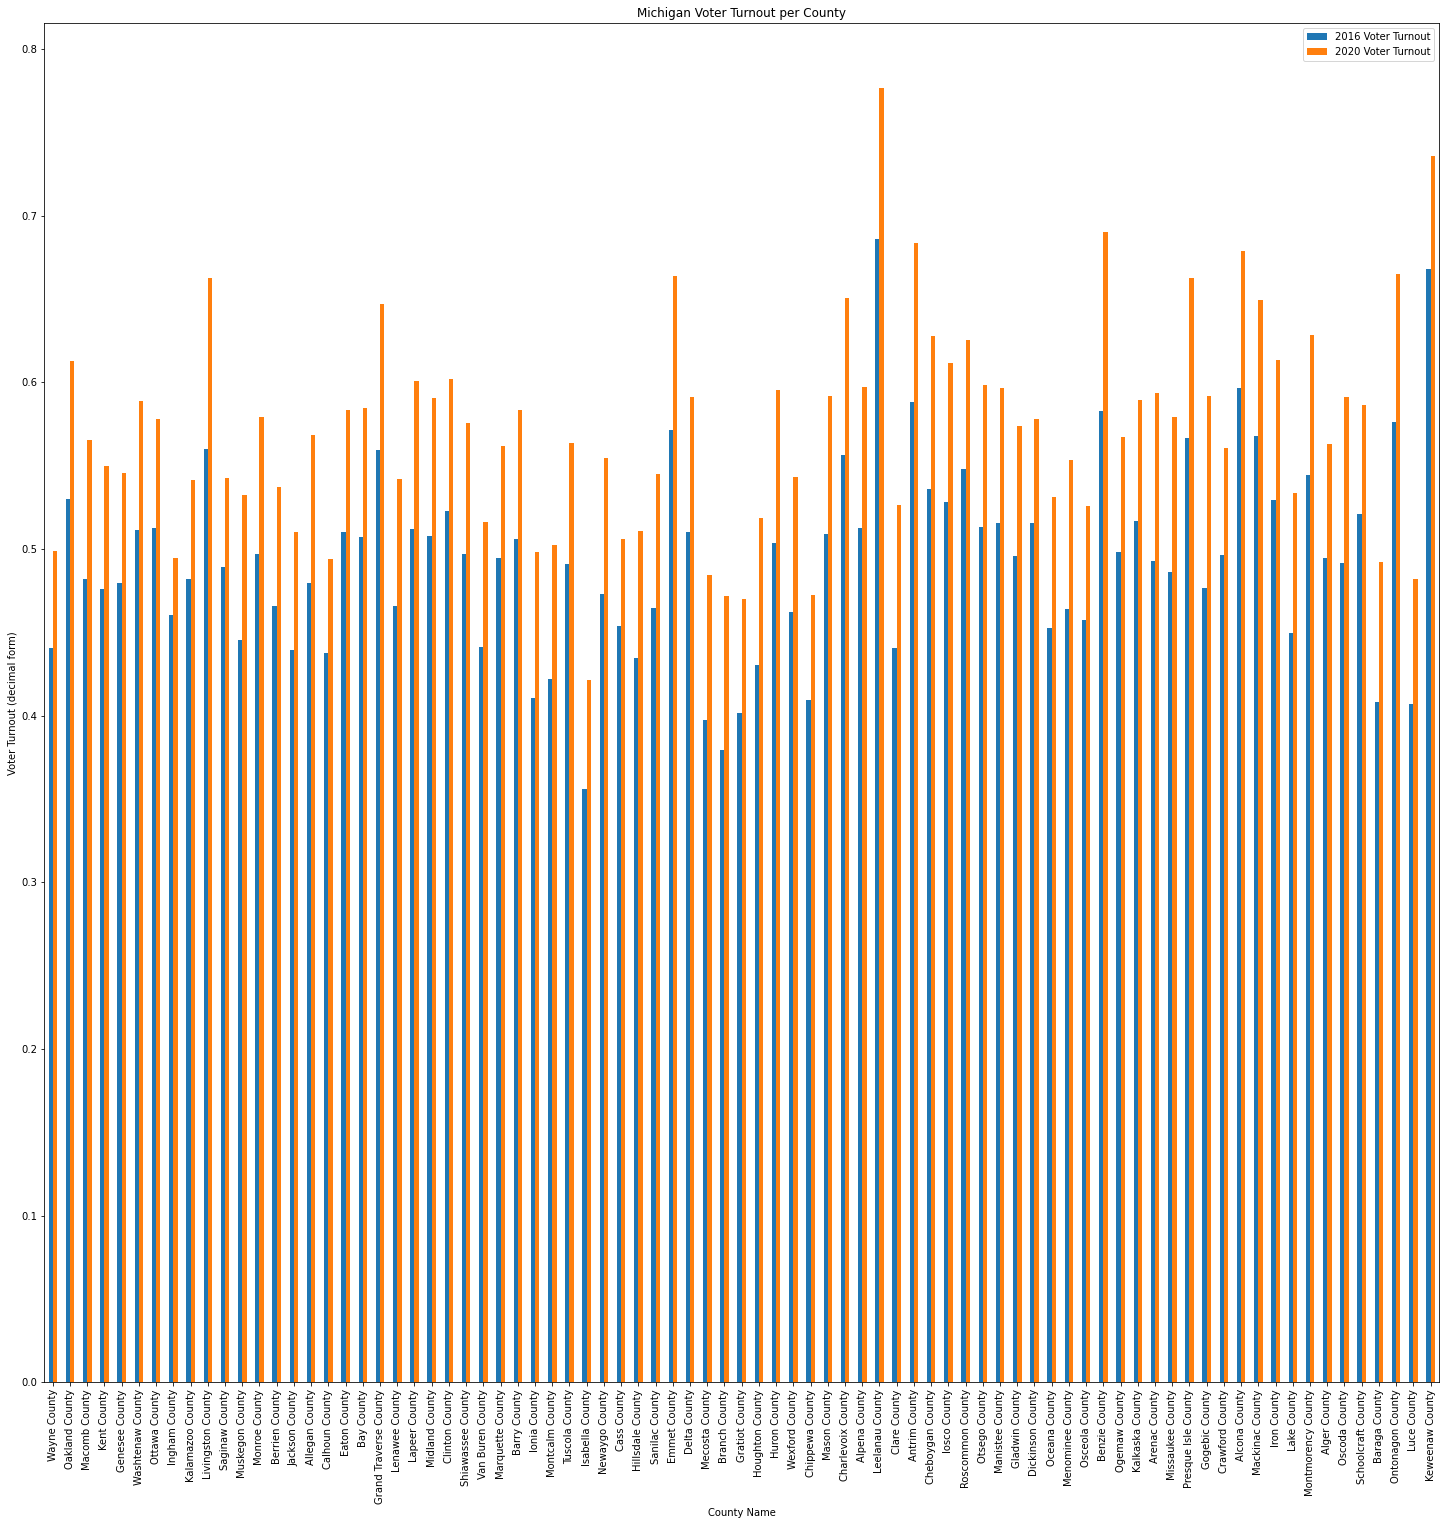

In [218]:
# Creating a visualization for the voter turnout data 
merged_michigan_data.plot(x="County Name", y=["2016 Voter Turnout", "2020 Voter Turnout"], kind="bar", 
                         title='Michigan Voter Turnout per County', ylabel='Voter Turnout (decimal form)',
                        figsize=(25,25))
print('County Name:\t2016\t\t2020')
for i, r in merged_michigan_data.iterrows():
    print(r['County Name'] + ": " + str(round(r['2016 Voter Turnout']*100, 2)) + "%" + '\t\t'+ str(round(r['2020 Voter Turnout']*100, 2)) + "%")

## Pennsylvania Voter Turnout 2016 and 2020

In [219]:
pennsylvaniaPop['county_name'] = pennsylvaniaPop['County/State'].str.extract(r'([a-zA-Z]*\s*[a-zA-Z]*\s*County)')
pennsylvaniaPop = pennsylvaniaPop.drop(columns=['County/State'], axis=1)
cols = pennsylvaniaPop.columns.tolist()
cols = cols[-1:]  + cols[:-1]
pennsylvaniaPop = pennsylvaniaPop[cols]

In [220]:
# Creating merged table and dropping appropriate columns to make data look good
merged_pennsylvania_data = pd.merge(left=PA_data_2016, right=pennsylvaniaPop, on='county_name')
merged_pennsylvania_data.rename(columns={'2019': '2020 County Population', '2016': '2016 County Population', 'state_abbr': 
                                    'State Abbrev.', 'total_votes': '2016 Vote Count'}, inplace=True)


no_need_2016 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 
           'diff', 'per_point_diff', 'combined_fips', 'percent_votes']
no_need_2020 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 'diff', 'per_point_diff', 'State Abbrev.', 'percent_votes']


merged_pennsylvania_data = merged_pennsylvania_data.drop(columns=no_need_2016, axis=1)
merged_pennsylvania_data = pd.merge(left=PA_data_2020, right=merged_pennsylvania_data, on='county_name')
merged_pennsylvania_data = merged_pennsylvania_data.drop(columns=no_need_2020, axis=1)

merged_pennsylvania_data.rename(columns={'total_votes': '2020 Vote Count'}, inplace=True)
merged_pennsylvania_data.rename(columns={'county_name': 'County Name'}, inplace=True)

merged_pennsylvania_data = merged_pennsylvania_data[['state_name', 'County Name', 'county_fips', '2016 Vote Count',
                                           '2020 Vote Count', '2016 County Population', '2020 County Population']]
# converting 2016 County Population values from string to float
convert = merged_pennsylvania_data['2016 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_pennsylvania_data = merged_pennsylvania_data.drop(columns='2016 County Population', axis=1)
merged_pennsylvania_data['2016 County Population'] = convert

convert = merged_pennsylvania_data['2020 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_pennsylvania_data = merged_pennsylvania_data.drop(columns='2020 County Population', axis=1)
merged_pennsylvania_data['2020 County Population'] = convert

# Calculation of voter turnout percentage
voter_turnout_2016 = []
for i, r in merged_pennsylvania_data.iterrows():
    voter_turnout_2016.append(r['2016 Vote Count']/r['2016 County Population'])
merged_pennsylvania_data['2016 Voter Turnout'] = voter_turnout_2016

voter_turnout_2020 = []
for i, r in merged_pennsylvania_data.iterrows():
    voter_turnout_2020.append(r['2020 Vote Count']/r['2020 County Population'])
merged_pennsylvania_data['2020 Voter Turnout'] = voter_turnout_2020

merged_pennsylvania_data

state_name          County Name  county_fips  2016 Vote Count  \
0   Pennsylvania  Philadelphia County        42101         680227.0   
1   Pennsylvania     Allegheny County        42003         643173.0   
2   Pennsylvania    Montgomery County        42091         427489.0   
3   Pennsylvania         Bucks County        42017         342572.0   
4   Pennsylvania      Delaware County        42045         284832.0   
..           ...                  ...          ...              ...   
62  Pennsylvania        Potter County        42105           7777.0   
63  Pennsylvania        Fulton County        42057           6743.0   
64  Pennsylvania      Sullivan County        42113           3168.0   
65  Pennsylvania        Forest County        42053           2398.0   
66  Pennsylvania       Cameron County        42023           2024.0   

    2020 Vote Count  2016 County Population  2020 County Population  \
0            741377               1576051.0               1584064.0   
1            724800               1226426.0               1216045.0   
2            510157                819791.0                830915.0   
3            396234                625861.0                628270.0   
4            329006                563708.0                566747.0   
..              ...                     ...                     ...   
62             9064                 16954.0                 16526.0   
63             7977                 14497.0                 14530.0   
64             3595                  6126.0                  6066.0   
65             2646                  7334.0                  7247.0   
66             2434                  4710.0                  4447.0   

    2016 Voter Turnout  2020 Voter Turnout  
0             0.431602            0.468022  
1             0.524429            0.596031  
2             0.521461            0.613970  
3             0.547361            0.630675  
4             0.505283            0.580517  
..                 ...                 ...  
62            0.458712            0.548469  
63            0.465131            0.549002  
64            0.517140            0.592648  
65            0.326970            0.365117  
66            0.429724            0.547335  

[67 rows x 9 columns]

County Name:	2016		2020
Philadelphia County: 43.16%		46.8%
Allegheny County: 52.44%		59.6%
Montgomery County: 52.15%		61.4%
Bucks County: 54.74%		63.07%
Delaware County: 50.53%		58.05%
Chester County: 51.6%		60.14%
Lancaster County: 44.44%		51.56%
York County: 45.79%		53.1%
Berks County: 42.31%		48.8%
Westmoreland County: 51.24%		58.81%
Lehigh County: 42.24%		50.01%
Northampton County: 47.39%		56.14%
Luzerne County: 41.85%		48.3%
Dauphin County: 47.47%		52.95%
Cumberland County: 46.52%		55.88%
Erie County: 42.45%		50.82%
Washington County: 46.75%		57.27%
Lackawanna County: 48.69%		55.04%
Butler County: 49.41%		60.32%
Beaver County: 47.4%		57.42%
Monroe County: 39.67%		49.23%
Franklin County: 45.12%		52.11%
Centre County: 46.53%		47.72%
Lebanon County: 42.54%		50.68%
Schuylkill County: 43.73%		49.95%
Cambria County: 44.76%		54.21%
Blair County: 42.06%		52.2%
Fayette County: 40.37%		48.07%
Lycoming County: 43.78%		52.3%
Mercer County: 44.05%		52.96%
Adams County: 46.25%		55.06%
Lawrence 

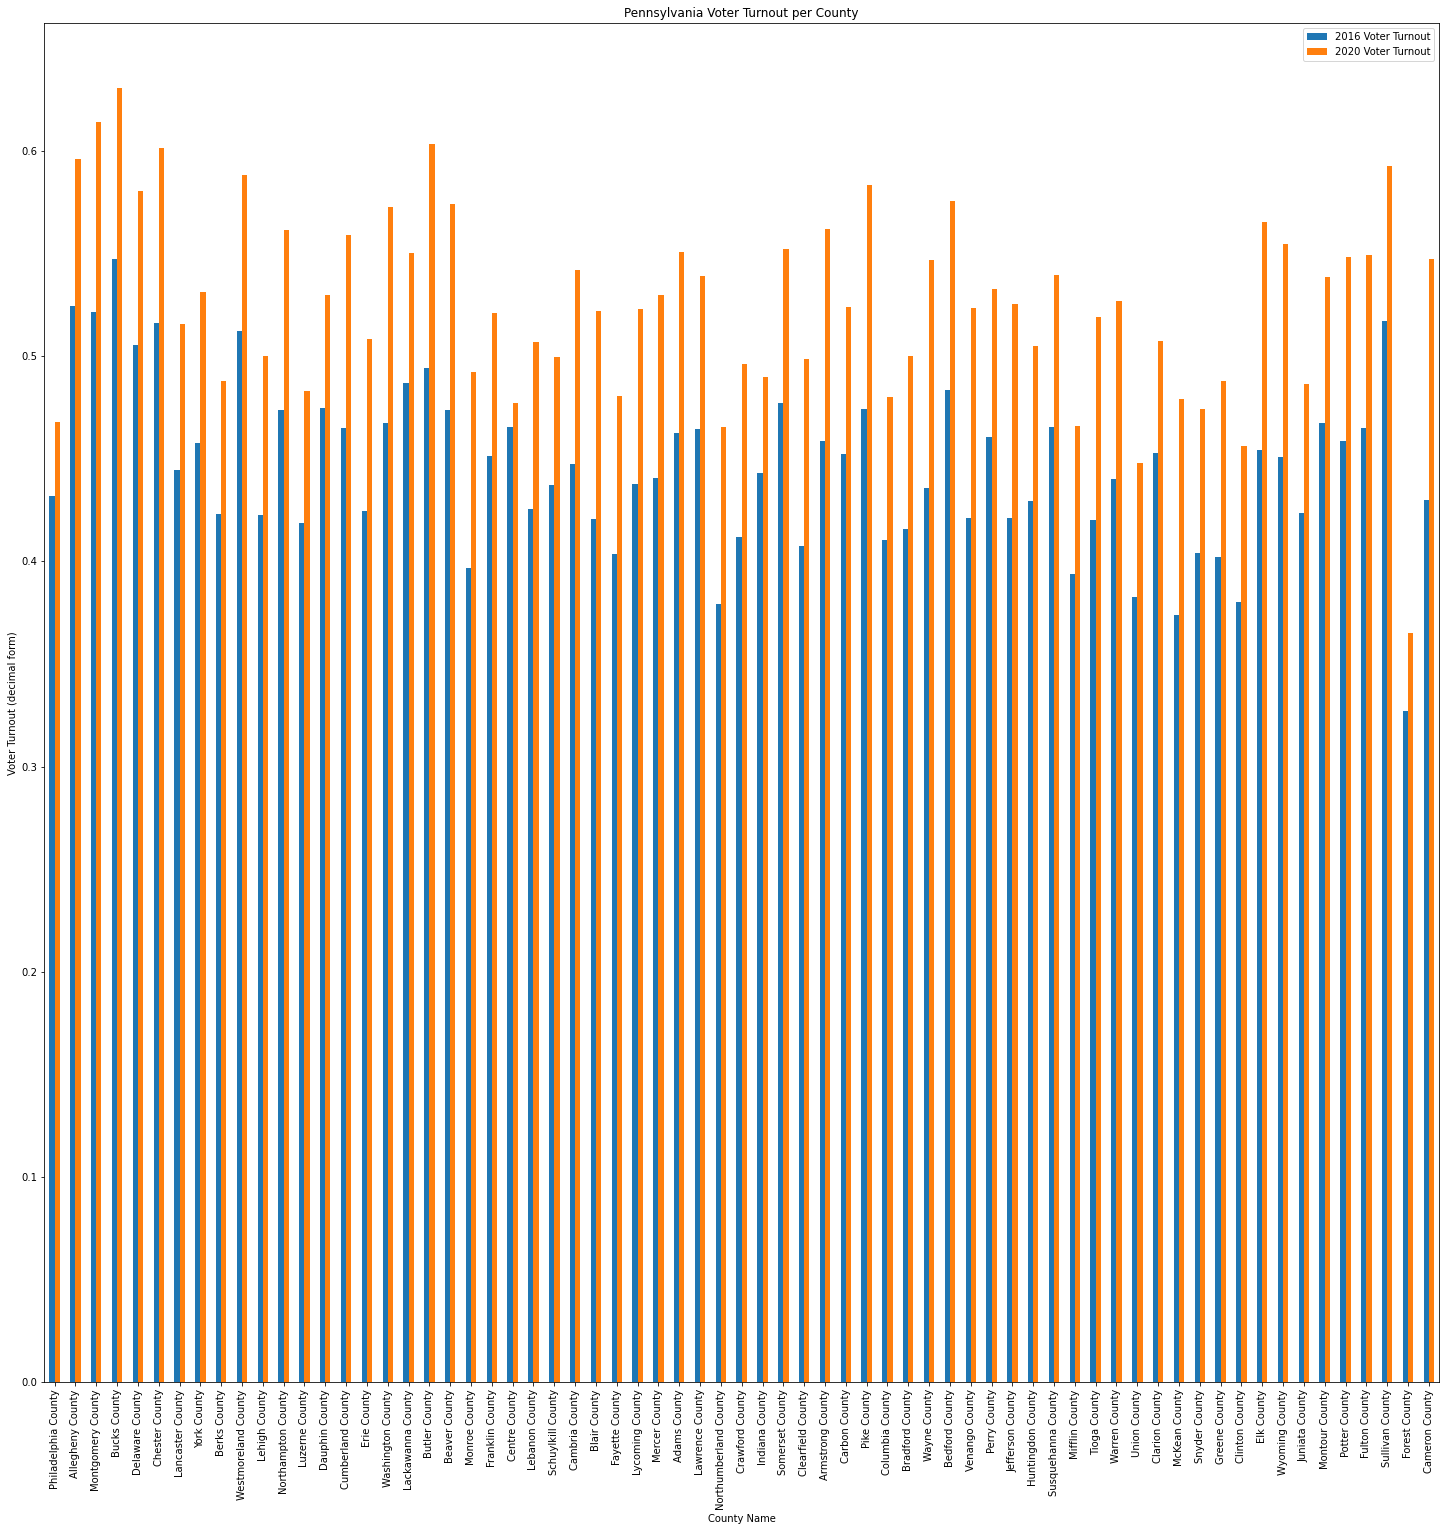

In [221]:
# Creating a visualization for the voter turnout data 
merged_pennsylvania_data.plot(x="County Name", y=["2016 Voter Turnout", "2020 Voter Turnout"], kind="bar", 
                         title='Pennsylvania Voter Turnout per County', ylabel='Voter Turnout (decimal form)',
                        figsize=(25,25))
print('County Name:\t2016\t\t2020')
for i, r in merged_pennsylvania_data.iterrows():
    print(r['County Name'] + ": " + str(round(r['2016 Voter Turnout']*100, 2)) + "%" + '\t\t'+ str(round(r['2020 Voter Turnout']*100, 2)) + "%")

## Wisconsin Voter Turnout 2016 and 2020

In [222]:
wisconsinPop['county_name'] = wisconsinPop['County/State'].str.extract(r'([a-zA-Z]*\s*[a-zA-Z]*\s*County)')
wisconsinPop = wisconsinPop.drop(columns=['County/State'], axis=1)
cols = wisconsinPop.columns.tolist()
cols = cols[-1:]  + cols[:-1]
wisconsinPop = wisconsinPop[cols]

In [223]:
# Creating merged table and dropping appropriate columns to make data look good
merged_wisconsin_data = pd.merge(left=WI_data_2016, right=wisconsinPop, on='county_name')
merged_wisconsin_data.rename(columns={'2019': '2020 County Population', '2016': '2016 County Population', 'state_abbr': 
                                    'State Abbrev.', 'total_votes': '2016 Vote Count'}, inplace=True)


no_need_2016 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 
           'diff', 'per_point_diff', 'combined_fips', 'percent_votes']
no_need_2020 = ['votes_dem', 'votes_gop', 'per_dem', 'per_gop', 'diff', 'per_point_diff', 'State Abbrev.', 'percent_votes']


merged_wisconsin_data = merged_wisconsin_data.drop(columns=no_need_2016, axis=1)
merged_wisconsin_data = pd.merge(left=WI_data_2020, right=merged_wisconsin_data, on='county_name')
merged_wisconsin_data = merged_wisconsin_data.drop(columns=no_need_2020, axis=1)

merged_wisconsin_data.rename(columns={'total_votes': '2020 Vote Count'}, inplace=True)
merged_wisconsin_data.rename(columns={'county_name': 'County Name'}, inplace=True)

merged_wisconsin_data = merged_wisconsin_data[['state_name', 'County Name', 'county_fips', '2016 Vote Count',
                                           '2020 Vote Count', '2016 County Population', '2020 County Population']]
# converting 2016 County Population values from string to float
convert = merged_wisconsin_data['2016 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_wisconsin_data = merged_wisconsin_data.drop(columns='2016 County Population', axis=1)
merged_wisconsin_data['2016 County Population'] = convert

convert = merged_wisconsin_data['2020 County Population'].tolist()

cnt = 0
for i in convert:
    convert[cnt] = float("".join(i.split(",")))
    cnt += 1

merged_wisconsin_data = merged_wisconsin_data.drop(columns='2020 County Population', axis=1)
merged_wisconsin_data['2020 County Population'] = convert

# Calculation of voter turnout percentage
voter_turnout_2016 = []
for i, r in merged_wisconsin_data.iterrows():
    voter_turnout_2016.append(r['2016 Vote Count']/r['2016 County Population'])
merged_wisconsin_data['2016 Voter Turnout'] = voter_turnout_2016

voter_turnout_2020 = []
for i, r in merged_wisconsin_data.iterrows():
    voter_turnout_2020.append(r['2020 Vote Count']/r['2020 County Population'])
merged_wisconsin_data['2020 Voter Turnout'] = voter_turnout_2020

merged_wisconsin_data

state_name       County Name  county_fips  2016 Vote Count  \
0   Wisconsin  Milwaukee County        55079         434970.0   
1   Wisconsin       Dane County        55025         304729.0   
2   Wisconsin   Waukesha County        55133         233273.0   
3   Wisconsin      Brown County        55009         127497.0   
4   Wisconsin  Outagamie County        55087          93474.0   
..        ...               ...          ...              ...   
65  Wisconsin     Forest County        55041           4507.0   
66  Wisconsin      Pepin County        55091           3746.0   
67  Wisconsin       Iron County        55051           3477.0   
68  Wisconsin   Florence County        55037           2651.0   
69  Wisconsin  Menominee County        55078           1279.0   

    2020 Vote Count  2016 County Population  2020 County Population  \
0            458971                954841.0                945726.0   
1            344791                531296.0                546695.0   
2            267996                398521.0                404198.0   
3            144017                259514.0                264542.0   
4            108022                184593.0                187885.0   
..              ...                     ...                     ...   
65             5053                  9021.0                  9004.0   
66             4144                  7250.0                  7287.0   
67             4010                  5660.0                  5687.0   
68             2940                  4313.0                  4295.0   
69             1590                  4527.0                  4556.0   

    2016 Voter Turnout  2020 Voter Turnout  
0             0.455542            0.485311  
1             0.573558            0.630683  
2             0.585347            0.663031  
3             0.491291            0.544401  
4             0.506379            0.574937  
..                 ...                 ...  
65            0.499612            0.561195  
66            0.516690            0.568684  
67            0.614311            0.705117  
68            0.614653            0.684517  
69            0.282527            0.348990  

[70 rows x 9 columns]

County Name:	2016		2020
Milwaukee County: 45.55%		48.53%
Dane County: 57.36%		63.07%
Waukesha County: 58.53%		66.3%
Brown County: 49.13%		54.44%
Outagamie County: 50.64%		57.49%
Racine County: 48.08%		54.23%
Winnebago County: 50.64%		54.7%
Kenosha County: 45.17%		52.33%
Washington County: 56.77%		64.74%
Rock County: 46.52%		52.25%
Marathon County: 50.96%		56.56%
La Crosse County: 53.35%		57.52%
Sheboygan County: 50.67%		57.23%
Ozaukee County: 60.42%		68.91%
Eau Claire County: 52.55%		55.69%
Walworth County: 49.28%		55.46%
Dodge County: 49.0%		55.14%
Jefferson County: 50.11%		56.6%
Manitowoc County: 50.4%		56.76%
Wood County: 51.51%		56.57%
Portage County: 54.11%		57.37%
Sauk County: 49.11%		56.18%
Chippewa County: 49.54%		55.58%
Columbia County: 51.49%		58.87%
Calumet County: 53.28%		61.44%
Waupaca County: 49.68%		57.13%
Polk County: 52.5%		60.23%
Grant County: 46.27%		49.78%
Barron County: 49.76%		56.02%
Douglas County: 51.17%		57.19%
Oneida County: 58.98%		67.87%
Dunn County: 49.67%	

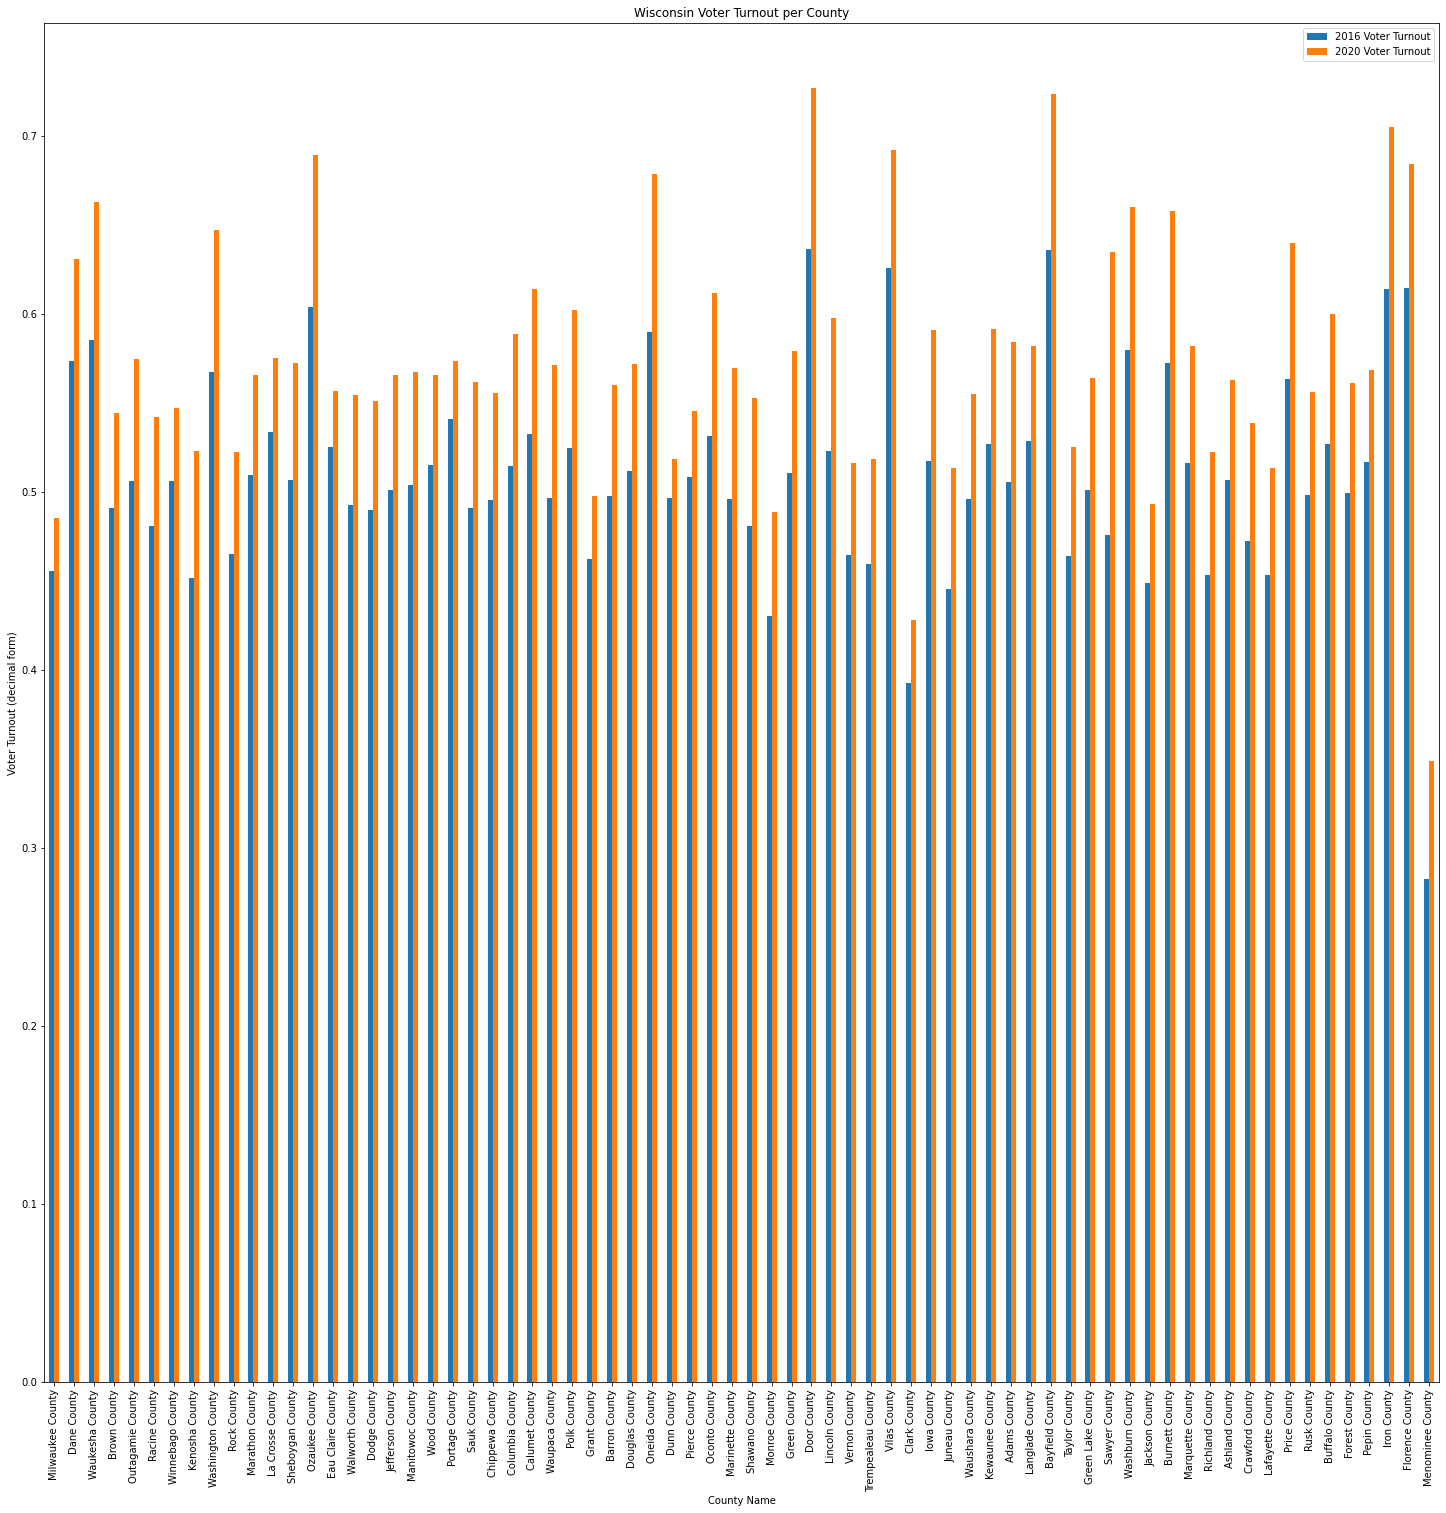

In [224]:
# Creating a visualization for the voter turnout data 
merged_wisconsin_data.plot(x="County Name", y=["2016 Voter Turnout", "2020 Voter Turnout"], kind="bar", 
                         title='Wisconsin Voter Turnout per County', ylabel='Voter Turnout (decimal form)',
                        figsize=(25,25))
print('County Name:\t2016\t\t2020')
for i, r in merged_wisconsin_data.iterrows():
    print(r['County Name'] + ": " + str(round(r['2016 Voter Turnout']*100, 2)) + "%" + '\t\t'+ str(round(r['2020 Voter Turnout']*100, 2)) + "%")

As you can see from viewing these five double-bar graphs, each state experienced an increase in voter turnout for nearly every single county from the year 2016 to 2020. Looking at the most of the 2016 data (blue bars), voter turnout averaged around 40-50%, with a few counties throughout our distributions being nearly 60-70%. When turning out attention to the 2020 data (orange bars), there is clear and definitive increase, with the average now bumped up to around 60% voter turnout. This stark increase is paramount for our analysis of these states, as the higher turnout led to more votes and ultimately the flipping of the state from 2016 to 2020.

# State Map Visualization

Visit [County Choropleth Maps In Python](https://plotly.com/python/county-choropleth/) to learn more.

Using the link above, we will now create maps for each of these five states that we are interested in.

First, we need to download some packages to run the visualization.

In [225]:
!pip install --upgrade plotly
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install plotly-geo
!pip3 install plotly
!pip install flask

Requirement already up-to-date: plotly in /opt/conda/lib/python3.8/site-packages (4.14.1)
Requirement already up-to-date: geopandas in /opt/conda/lib/python3.8/site-packages (0.8.1)
Requirement already up-to-date: pyshp in /opt/conda/lib/python3.8/site-packages (2.1.2)
Requirement already up-to-date: shapely in /opt/conda/lib/python3.8/site-packages (1.7.1)


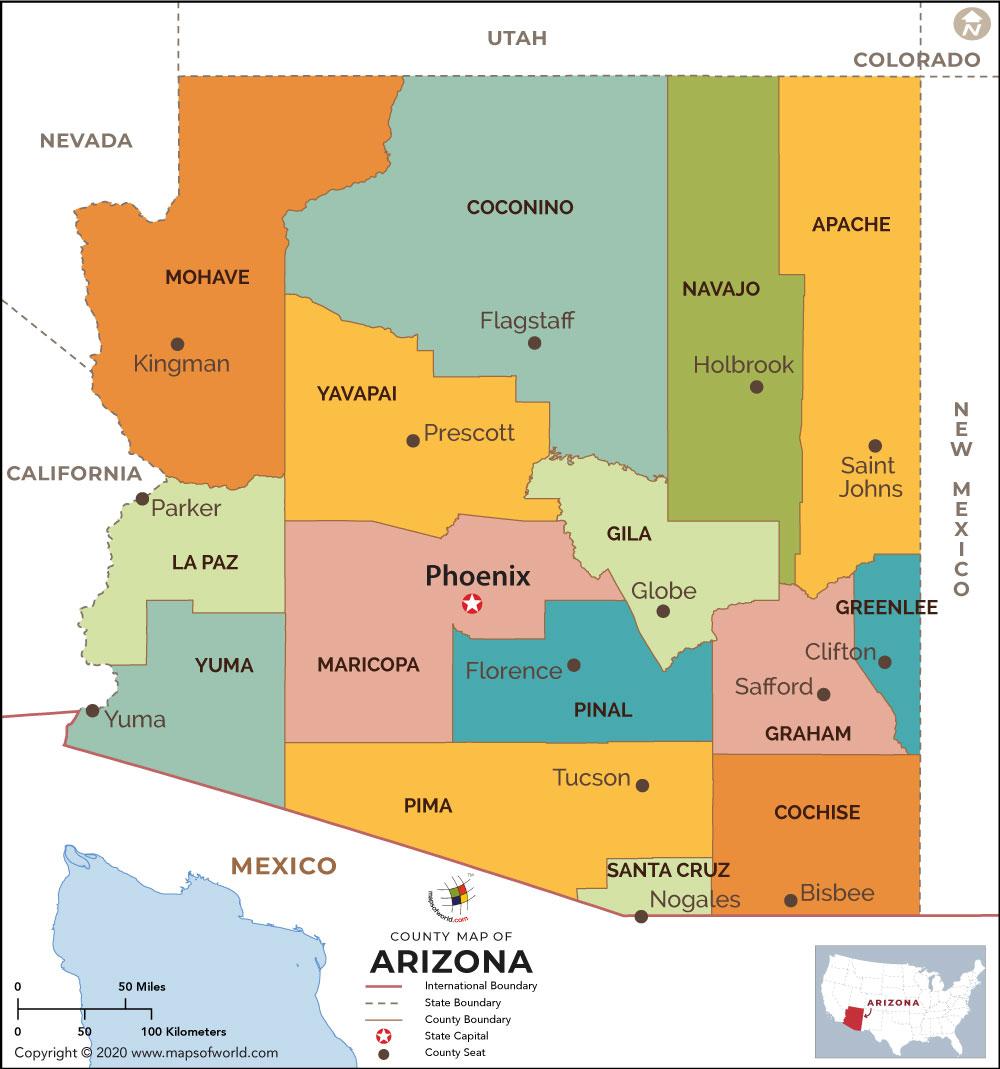

In [226]:
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
from flask import Markup


values = (merged_arizona_data['2020 Voter Turnout']-merged_arizona_data['2016 Voter Turnout'])*100
fips = merged_arizona_data['county_fips']


endpts = list(np.mgrid[min(values):max(values):9j])
colorscale = [
    'rgb(210,210,254)',
    'rgb(193, 193, 193)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)',
    'rgb(181, 137, 214)',
    'rgb(153, 105, 199)',
    'rgb(128, 79, 179)',
    'rgb(106, 53, 156)',
    'rgb(85, 37, 134)'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Arizona'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Increase in Percentage of Turnout',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

from IPython.display import Image
Image(filename='arizona-county-map.jpg')

Here we have a map displaying which counties in Arizona had what percentage of voter turnout increase. Here is also a reference map of Arizona counties showing the largest cities from each counties and visually displaying the names of each county.

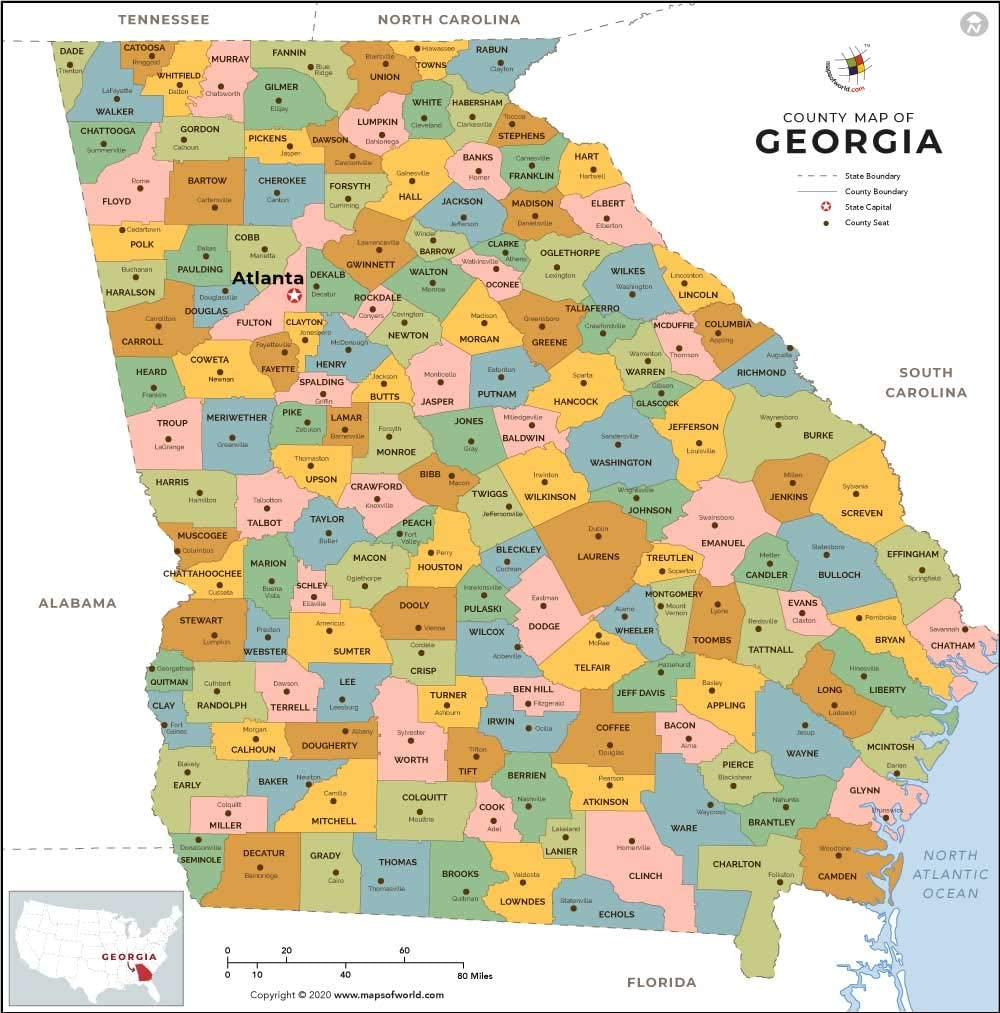

In [227]:
values = (merged_georgia_data['2020 Voter Turnout']-merged_georgia_data['2016 Voter Turnout'])*100
#values[150]=5.0
#values[151]=5.0
values = values.drop(index=[150,151])

fips = merged_georgia_data['county_fips']

fips = fips.drop(index=[150,151])

endpts = list(np.mgrid[min(values):max(values):9j])
colorscale = [
    'rgb(210,210,254)',
    'rgb(193, 193, 193)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)',
    'rgb(181, 137, 214)',
    'rgb(153, 105, 199)',
    'rgb(128, 79, 179)',
    'rgb(106, 53, 156)',
    'rgb(85, 37, 134)'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['GA'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Increase in Percentage of Turnout',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()
Image(filename='georgia-county-map.jpg')

Here we have a map displaying which counties in Georgia had what percentage of voter turnout increase. Here is also a reference map of Georgia counties showing the largest cities from each counties and visually displaying the names of each county. One part that is not shown is that Chattahoochee actually had a 3% decrease in voter turnout between the two years. Stewart county also had a marginal increase of 0.7% in voter turnout that could not be shown.

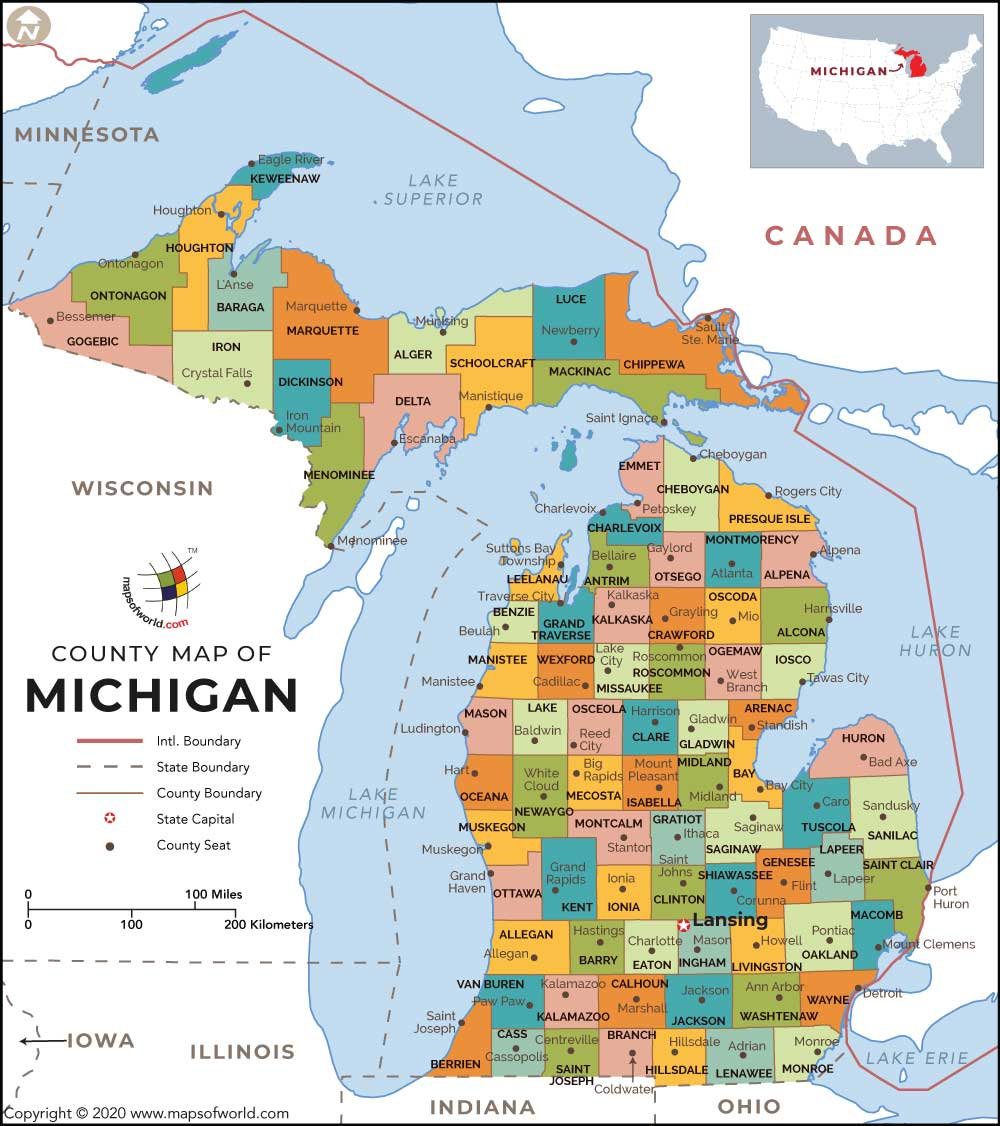

In [228]:
values = (merged_michigan_data['2020 Voter Turnout']-merged_michigan_data['2016 Voter Turnout'])*100
fips = merged_michigan_data['county_fips']


endpts = list(np.mgrid[min(values):max(values):9j])
colorscale = [
    'rgb(210,210,254)',
    'rgb(193, 193, 193)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)',
    'rgb(181, 137, 214)',
    'rgb(153, 105, 199)',
    'rgb(128, 79, 179)',
    'rgb(106, 53, 156)',
    'rgb(85, 37, 134)'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['MI'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Increase in Percentage of Turnout',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()
Image(filename='michigan-county-map.jpg')

Here we have a map displaying which counties in Michigan had what percentage of voter turnout increase. Here is also a reference map of Michigan counties showing the largest cities from each counties and visually displaying the names of each county.

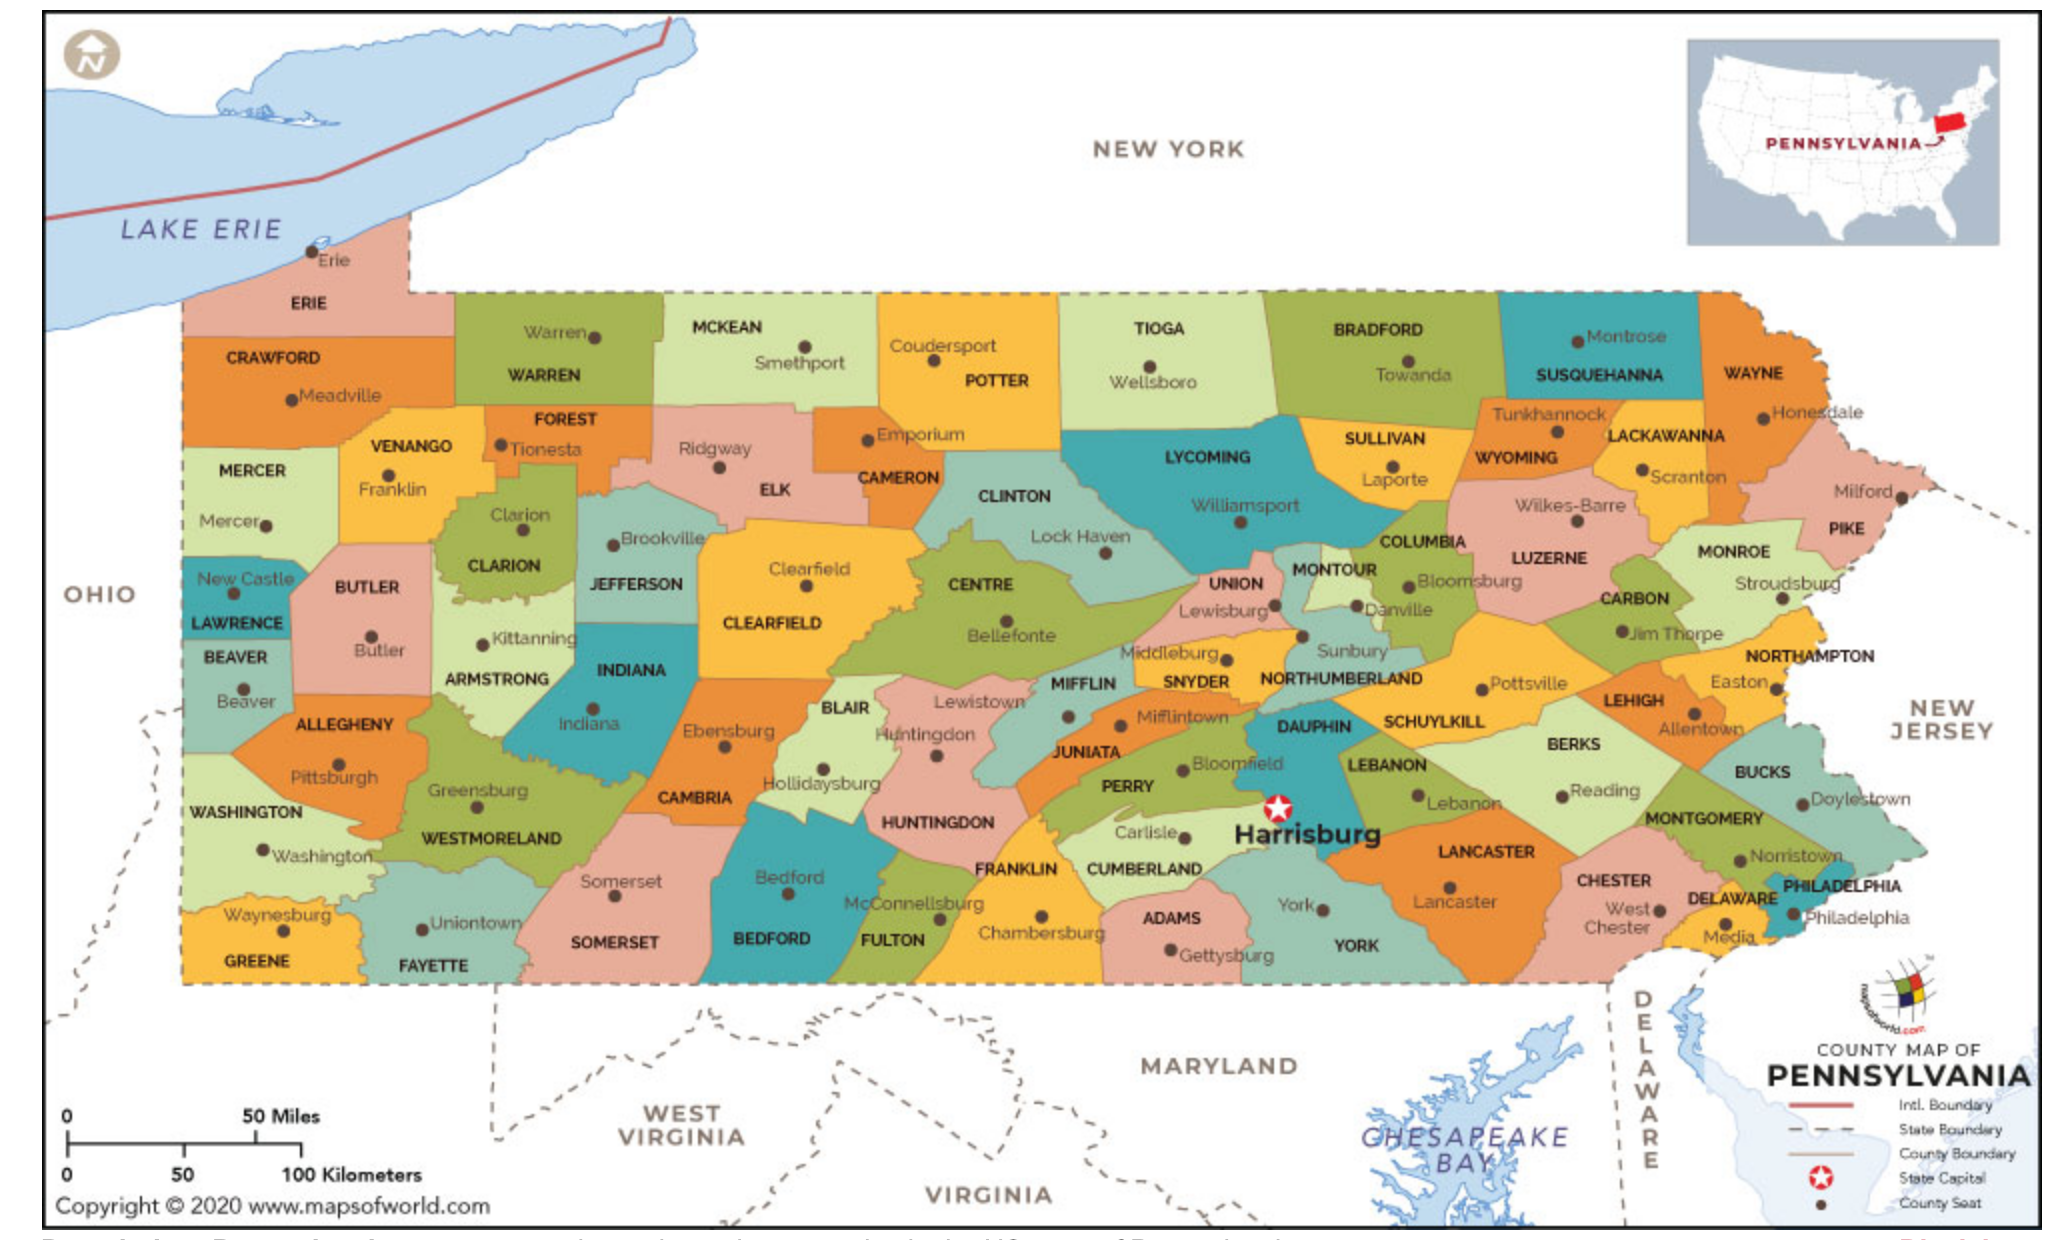

In [229]:
values = (merged_pennsylvania_data['2020 Voter Turnout']-merged_pennsylvania_data['2016 Voter Turnout'])*100
fips = merged_pennsylvania_data['county_fips']


endpts = list(np.mgrid[min(values):max(values):9j])
colorscale = [
    'rgb(210,210,254)',
    'rgb(193, 193, 193)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)',
    'rgb(181, 137, 214)',
    'rgb(153, 105, 199)',
    'rgb(128, 79, 179)',
    'rgb(106, 53, 156)',
    'rgb(85, 37, 134)'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['PA'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Increase in Percentage of Turnout',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()
Image(filename='pennsylvania-county-map.png')

Here we have a map displaying which counties in Pennsylvania had what percentage of voter turnout increase. Here is also a reference map of PA counties showing the largest cities from each counties and visually displaying the names of each county.

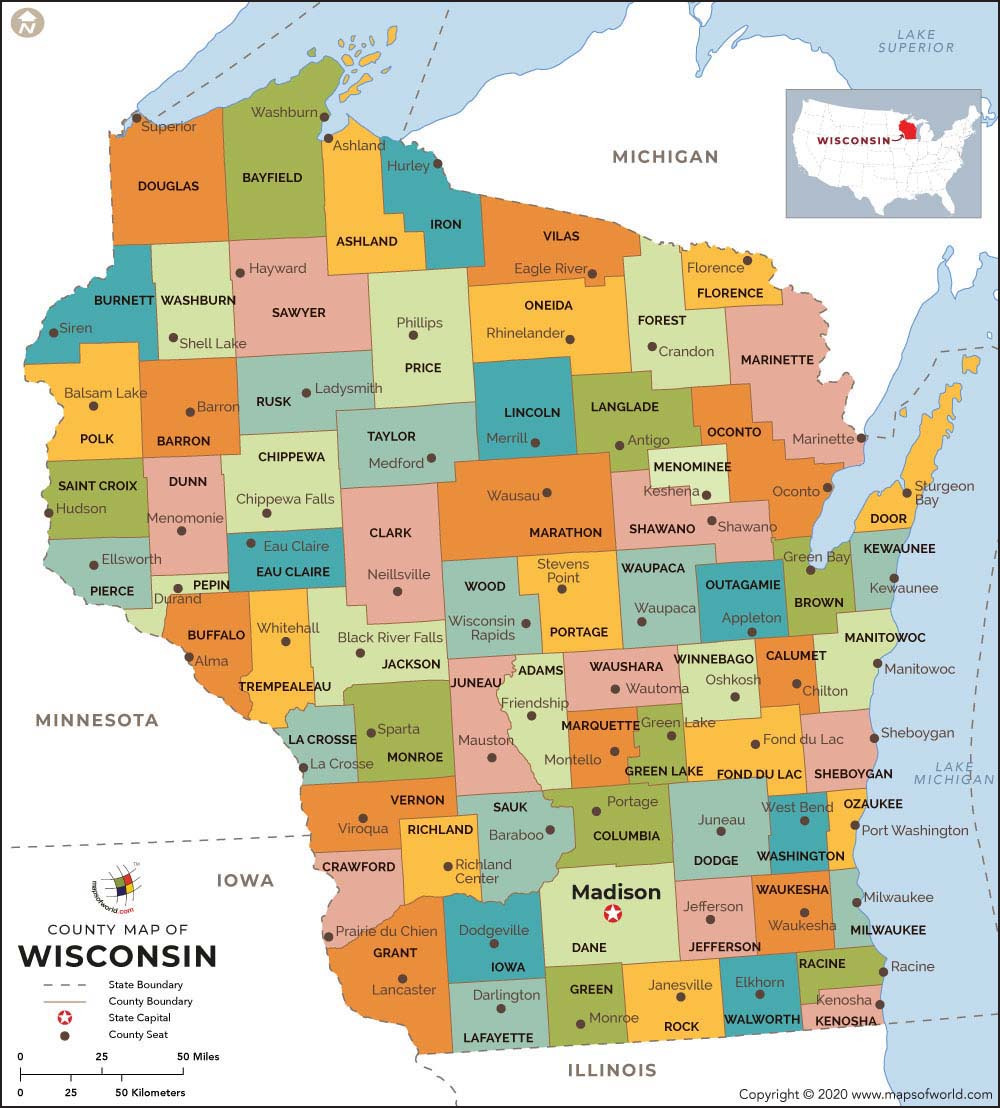

In [230]:
values = (merged_wisconsin_data['2020 Voter Turnout']-merged_wisconsin_data['2016 Voter Turnout'])*100
fips = merged_wisconsin_data['county_fips']


endpts = list(np.mgrid[min(values):max(values):9j])
colorscale = [
    'rgb(210,210,254)',
    'rgb(193, 193, 193)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)',
    'rgb(181, 137, 214)',
    'rgb(153, 105, 199)',
    'rgb(128, 79, 179)',
    'rgb(106, 53, 156)',
    'rgb(85, 37, 134)'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Wisonsin'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Increase in Percentage of Turnout',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()
Image(filename='wisconsin-county-map.jpg')

Here we have a map displaying which counties in Wisconsin had what percentage of voter turnout increase. Here is also a reference map of WI counties showing the largest cities from each counties and visually displaying the names of each county.

# Conclusion

In conclusion, the increase of voter turnout proved to have a monumental impact on the result of the 2020 Presidential Election. In the five states that flipped from 2016 to 2020 that we chose to research: Arizona, Georgia, Michigan, Pennsylvania, and Wisconsin, our analysis shows that the voter turnout increased for each of these states and each of the counties inside the states. This increase in voter turnout may have caused these states to flip but for this hypothesis to be confirmed, more research must be done into this topic. By looking at which specific counties have the highest number of total votes and looking at the voter turnout increases, conclusions can be drawn about which specific counties caused the election to flip. 